# Lending Club Case Study Notebook

##### By : Debasish Deaty

##### Date : 03rd Sep 2023

# Objectives:
The Objective of this case study is to implement the EDA technique on a real-world problem understand the insights and present in a business-first manner via presentation.

Lending Club is a marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return. For lending companies, lending loans to risky applicants is the largest source of financial loss. The credit loss is the amount of money lost by the lender when the borrower defaults to a loan payment. In such a case, the concerned person is labelled as **charged-of** and **defaulters**. 

If one is able to *identify these risky loan applicants*, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, **the company wants to understand the driving factors (or driver variables)** behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

### Goal
How data can be used minimize the risk of losing money while lending to customers.

### Benefits of the case study:
Gives an idea about how EDA is used in real-life business problems.
It also develops a basic understanding of risk analytics in banking and financial services.
How the data is used to minimize loss of money while lending it to clients.
It improves our understating of visualization and what charts to use for real life data.

### Context: 
Lending Club wants to understand the driving factors behind loan default or non-default which are strong parameters of default. The company can utilize this knowledge for its portfolio and risk assessment in terms of loan issues.

### Target
Reduce the Credit Loss by using EDA techniques to find driving factors for the defaulting of loan.

### Risk associated with the problem
- If the applicant is likely to repay the loan, then not approving loan is a loss of business (rejecting loans for non - default).
- If the applicant is not likely to repay the loan, then approving loan may lead to financial loss (approving loans for default).
- The given dataset contains information about past loans and each row represents the loan details of the applicants.

### Problem Statement: 
As a data scientist working for Lending Club analyze the dataset containing information about past loan applicants using EDA to understand how consumer attributes and loan attributes influence the tendency of default

In [16]:
# Importing all libraries required.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set it to convert scientific values
pd.options.display.float_format = '{:.2f}'.format 

# Regular expressions for string manipulation
import re

# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

In [17]:
#read the dataset and check the first five rows
data = pd.read_csv('loan.csv')
data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   
1  1077430    1314167       2500         2500          2500.00   60 months   
2  1077175    1313524       2400         2400          2400.00   36 months   
3  1076863    1277178      10000        10000         10000.00   36 months   
4  1075358    1311748       3000         3000          3000.00   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                 0.00   
1                NaN            NaN               NaN                 0.00   
2                NaN            NaN               NaN                 0.00   
3                NaN            NaN               NaN                 0.00   
4                NaN            NaN               NaN                 0.00   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0      0.00             NaN               NaN            NaN   
1      0.00             NaN               NaN            NaN   
2      0.00             NaN               NaN            NaN   
3      0.00             NaN               NaN            NaN   
4      0.00             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

From this we can say that there are 39717 rows and 111 columns

# 0) Data Understanding

- The dataset has 39717 rows and 111 columns. 
- There are many columns that consist of null values and NAN values.
- The dataset has a mixture of categorical and continuous data.
- Some of the columns only consist of NAN values.
- There are some columns that have string values also.
- The columns in the dataset have duplicate values.
- Our dataset needs a good amount of pre-processing.


# 1) Data Cleaning

In [18]:
#finding total null values in each column and store them in null_value variable.
null_value = data.isnull().sum()
#printing columns that have more than 0 null values or missing values
null_value[null_value > 0]

emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
mths_since_last_delinq        25682
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 68, dtype: int64

In [19]:
#Removing columns which has more than 10000 null values in it.
data.drop(null_value[null_value > 10000].index, axis=1, inplace=True)

#After that rechecking the shape again to verify the shape
data.shape

(39717, 53)

In [20]:
#checking how many unique values are there in each column
data.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

From this we can see that the column named <b>"tax_liens, delinq_amnt, chargeoff_within_12_mths, acc_now_delinq                application_type, policy_code, collections_12_mths_ex_med, initial_list_status, pymnt_plan"</b> has only 1 unique value.
So we can remove those column as it won't give us useful information.

In [21]:
#storing unique values of each column in unique_column
unique_column = data.nunique()

In [22]:
#storing only the columns that has unique value equals to 1 in single_unique
single_unique = unique_column[unique_column.values == 1]
#showing index of single unique value
single_unique.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [23]:
#dropping all the columns that have unique value equals to 1
data.drop(columns = list(single_unique.index), inplace=True)
#checking shape
data.shape

(39717, 44)

In [24]:
#once again analysing the unique value in descending order
data.nunique().sort_values(ascending=False).head()

id                 39717
url                39717
member_id          39717
total_pymnt        37850
total_pymnt_inv    37518
dtype: int64

From above we can say that, column named <b>"id, url and member_id"</b> are having same number of unique value that of number of rows in dataframe.
So, in this case we can remove two columns <b>i.e. url and  member_id</b> as we required only one primary key.

In [25]:
#dropping url and member_id
data.drop(['url', 'member_id'], axis=1, inplace=True)
#checking shape
data.shape

(39717, 42)

In [26]:
#analysing null values once again in each column
data.isnull().sum().head(12)

id                    0
loan_amnt             0
funded_amnt           0
funded_amnt_inv       0
term                  0
int_rate              0
installment           0
grade                 0
sub_grade             0
emp_title          2459
emp_length         1075
home_ownership        0
dtype: int64

As we can see that null value and unique value of <b>emp_title</b> is more, so we can drop this column as it will disturb our analysis.

In [27]:
#dropping emp_title column
data.drop(['emp_title'], axis=1, inplace=True)
#checking shape
data.shape

(39717, 41)

In [28]:
#To check the null values greater than 0
null_values = data.isnull().sum()
null_values[null_values > 0]

emp_length              1075
title                     11
revol_util                50
last_pymnt_d              71
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64

We can remove the null value rows of the above column so that it won't effect our analysis.

In [29]:
#dropping the rows of above null values
data.dropna(subset=['emp_length', 'title', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'], inplace=True)
data.shape

(37825, 41)

#### Analysing the columns

In [30]:
#analysing the columns
data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

From above we can say that there are some <b>customer behaviour variables</b> that are not availbale at the time of loan application, and thus they cannot be used as prediction of credit approval therefore we can remove those variables from our dataset.

In [31]:
#Dropping customer behaviour columnS
data.drop(['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc','open_acc', 'pub_rec','revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee', 'recoveries', 'collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'], axis=1, inplace=True)
#Rechecking the shape
data.shape

(37825, 21)

In [32]:
#analyzing unique value of loan_status column
data["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

From above, we can say that there are 3 distinct value but the loan status <b>"Current"</b> doesn't give any information for approving or rejecting loan application. So, we can drop the rows having value current.

In [33]:
#dropping rows having value current
data = data[data["loan_status"] != 'Current']
#checking shape
data.shape

(36727, 21)

#### Analyzing unique value of term column

In [34]:
#analyzing unique value of term column
data["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

Here we can see that there is a empty space at the start of the term values. So let's remove it.

In [35]:
#Stripping empty space in values in term
data["term"] = data.term.str.strip()
data.term.unique()

array(['36 months', '60 months'], dtype=object)

The empty space at the start of the term values is removed now.

# 2) Data Manipulation 

Data manipulation is the process of organizing or arranging data in order to make it easier to interpret and make reading or interpreting the insights from the data more structured and comprises of having better design.

### Data type Conversion

In [36]:
#Analyzing data type in each column
data.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

<b>issue_d</b> are having date values as object, so we can convert the data type "object" to "date" 

In [37]:
#Converting to date type
data['issue_d'] = pd.to_datetime(data.issue_d, format='%b-%y')

In [38]:
#Analysing int_rate and revol_util column
data["int_rate"]

0        10.65%
1        15.27%
2        15.96%
3        13.49%
5         7.90%
          ...  
39562    10.28%
39573    10.59%
39623    12.49%
39666    11.22%
39680    11.86%
Name: int_rate, Length: 36727, dtype: object

Here we can observe that the column 'int_rate' have "%" because of which it is showing data type - Object. So we can remove "%" and convert it into float data type.

In [39]:
#stripping '%' value
data['int_rate'] = data.int_rate.str.strip('%').astype(float)

In [40]:
#let's see whether it is converted or not for proper analysis
data.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
pub_rec_bankruptcies           float64
dtype: object

## Outlier treatment

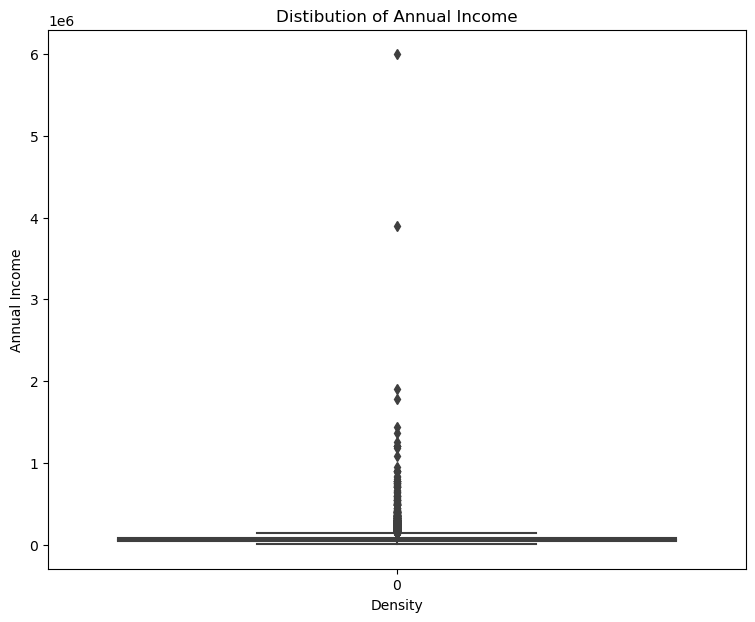

In [41]:
#Analyse outliers in annual_inc using boxplot
plt.figure(figsize=(9,7))
sns.boxplot(data['annual_inc'])
plt.xlabel('Density')
plt.ylabel('Annual Income')
plt.title('Distibution of Annual Income',fontsize=12)
plt.show()

In [42]:
#describing annual_inc column to get more insite
data.annual_inc.describe()

count     36727.00
mean      69471.94
std       64069.63
min        4000.00
25%       41200.00
50%       60000.00
75%       83000.00
max     6000000.00
Name: annual_inc, dtype: float64

In [43]:
data.annual_inc.quantile([0.90, 0.95, 0.97,0.98, 0.99])

0.90   117000.00
0.95   142000.00
0.97   166000.00
0.98   189000.00
0.99   235000.00
Name: annual_inc, dtype: float64

Clearly from above plot we can say that their is a presence of outlier.
* So let us remove the values after 95 percentile

In [44]:
#Removing the values after 95 percentile
percent_95 = data['annual_inc'].quantile(0.95)
data = data[data.annual_inc <= percent_95]

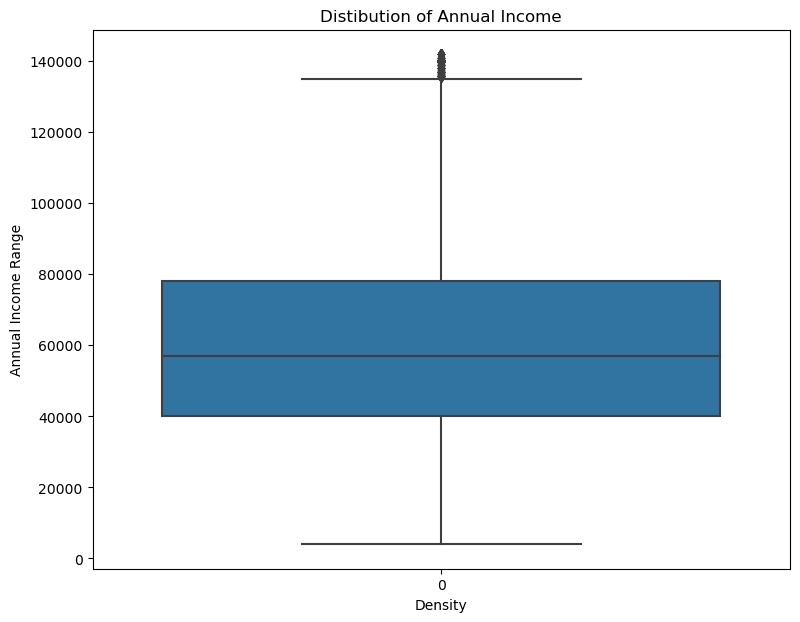

In [45]:
plt.figure(figsize=(9,7))
sns.boxplot(data['annual_inc'])
plt.xlabel('Density')
plt.ylabel('Annual Income Range')
plt.title('Distibution of Annual Income',fontsize=12)
plt.show()

Now. there is no such outliers in "annual_inc". So, we can proceed further.

# 3) Derived Variables
#### Derived variables are variables that are computed from one or more variables in the dataset. They are created by calculating or categorizing variables that already exist in your data set. 

#### Let's create new columns from date type columns

In [46]:
#creating new column 'month' and 'year' from 'issue_d' column
data["issue_d_year"] = data.issue_d.dt.year
data['issue_d_month'] = data.issue_d.dt.strftime('%b')

#### Let's see the approved loan amount percentage with the help of 'funded_amnt_inv' and 'loan_amnt' by creating new column

In [47]:
data['approved_loan_amt_percent'] = round(data.funded_amnt_inv*100/data.loan_amnt,2)

### Binning the data to analyse more efficiently.

In [48]:
# categorise loan amounts into buckets which will help in analysis further.
data['loan_amnt_bin'] = pd.cut(data['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
data['annual_inc_bin'] = pd.cut(data['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
data['int_rate_bin'] = pd.cut(data['int_rate'], [5, 10, 15, 20], labels=['5-10', '10-15', '15-20'])

# categorise dti into buckets for bivariate analysis.
data['dti_bin'] = pd.cut(data['dti'], [0, 5, 10, 15, 20, 25, 30], labels=['0-5', '05-10', '10-15', '15-20', '20-25','25-30'])

In [49]:
# Now check the data header again
data.head()

id  loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  \
0  1077501       5000         5000          4975.00  36 months     10.65   
1  1077430       2500         2500          2500.00  60 months     15.27   
2  1077175       2400         2400          2400.00  36 months     15.96   
3  1076863      10000        10000         10000.00  36 months     13.49   
5  1075269       5000         5000          5000.00  36 months      7.90   

   installment grade sub_grade emp_length  ... addr_state   dti  \
0       162.87     B        B2  10+ years  ...         AZ 27.65   
1        59.83     C        C4   < 1 year  ...         GA  1.00   
2        84.33     C        C5  10+ years  ...         IL  8.72   
3       339.31     C        C1  10+ years  ...         CA 20.00   
5       156.46     A        A4    3 years  ...         AZ 11.20   

  pub_rec_bankruptcies issue_d_year issue_d_month approved_loan_amt_percent  \
0                 0.00         2011           Dec                     99.50   
1                 0.00         2011           Dec                    100.00   
2                 0.00         2011           Dec                    100.00   
3                 0.00         2011           Dec                    100.00   
5                 0.00         2011           Dec                    100.00   

  loan_amnt_bin annual_inc_bin int_rate_bin  dti_bin  
0        0-7000    20000-40000        10-15    25-30  
1        0-7000    20000-40000        15-20      0-5  
2        0-7000        0-20000        15-20    05-10  
3    7000-14000    40000-60000        10-15    15-20  
5        0-7000    20000-40000         5-10    10-15  

[5 rows x 28 columns]

### changing the 'loan_status' to a numeric variable, assign 1 for defaulted loans and 0 for paid off ones

In [50]:
# changing the loan_status to a numeric variable, assign 1 for defaulted loans and 0 for paid off ones
data['loan_status_count'] = data['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
data.head(5)

id  loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  \
0  1077501       5000         5000          4975.00  36 months     10.65   
1  1077430       2500         2500          2500.00  60 months     15.27   
2  1077175       2400         2400          2400.00  36 months     15.96   
3  1076863      10000        10000         10000.00  36 months     13.49   
5  1075269       5000         5000          5000.00  36 months      7.90   

   installment grade sub_grade emp_length  ...   dti  pub_rec_bankruptcies  \
0       162.87     B        B2  10+ years  ... 27.65                  0.00   
1        59.83     C        C4   < 1 year  ...  1.00                  0.00   
2        84.33     C        C5  10+ years  ...  8.72                  0.00   
3       339.31     C        C1  10+ years  ... 20.00                  0.00   
5       156.46     A        A4    3 years  ... 11.20                  0.00   

  issue_d_year issue_d_month approved_loan_amt_percent loan_amnt_bin  \
0         2011           Dec                     99.50        0-7000   
1         2011           Dec                    100.00        0-7000   
2         2011           Dec                    100.00        0-7000   
3         2011           Dec                    100.00    7000-14000   
5         2011           Dec                    100.00        0-7000   

  annual_inc_bin int_rate_bin dti_bin  loan_status_count  
0    20000-40000        10-15   25-30                  0  
1    20000-40000        15-20     0-5                  1  
2        0-20000        15-20   05-10                  0  
3    40000-60000        10-15   15-20                  0  
5    20000-40000         5-10   10-15                  0  

[5 rows x 29 columns]

#### As we are done with cleaning the data, derived new variables for our analysis and removed the outliers. Now, we can start analysing the data.

# 4) Univariate Analysis

### Quantitative Variables

Let's see the distribution of loan amount , funded amount and funded amount by investor using distribution plot.

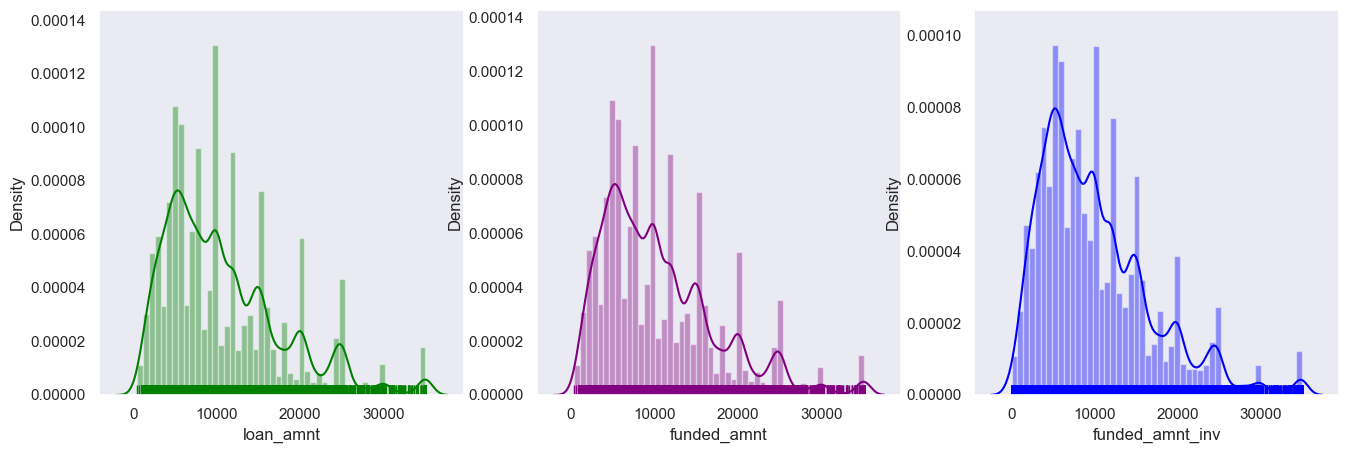

In [51]:
#Setting up the figure size of the plot
plt.figure(figsize=(16,5))
sns.set(style='dark',)

#Setting subplot index
plt.subplot(1,3,1)

#Distribution plot
sns.distplot(data['loan_amnt'],rug = True, color='green')

#Setting subplot index
plt.subplot(1,3,2)

#Distribution plot
sns.distplot(data['funded_amnt'],rug = True, color='purple')

#Setting subplot index
plt.subplot(1,3,3)

#Distribution plot
sns.distplot(data['funded_amnt_inv'],rug = True, color='blue')
plt.show()

#### Observations:
- Above, we can say that amount distribution looks very similar. So we can use <b>loan_amnt</b> for our further analysis.

### Analyzing Approved Loan Amount percentage

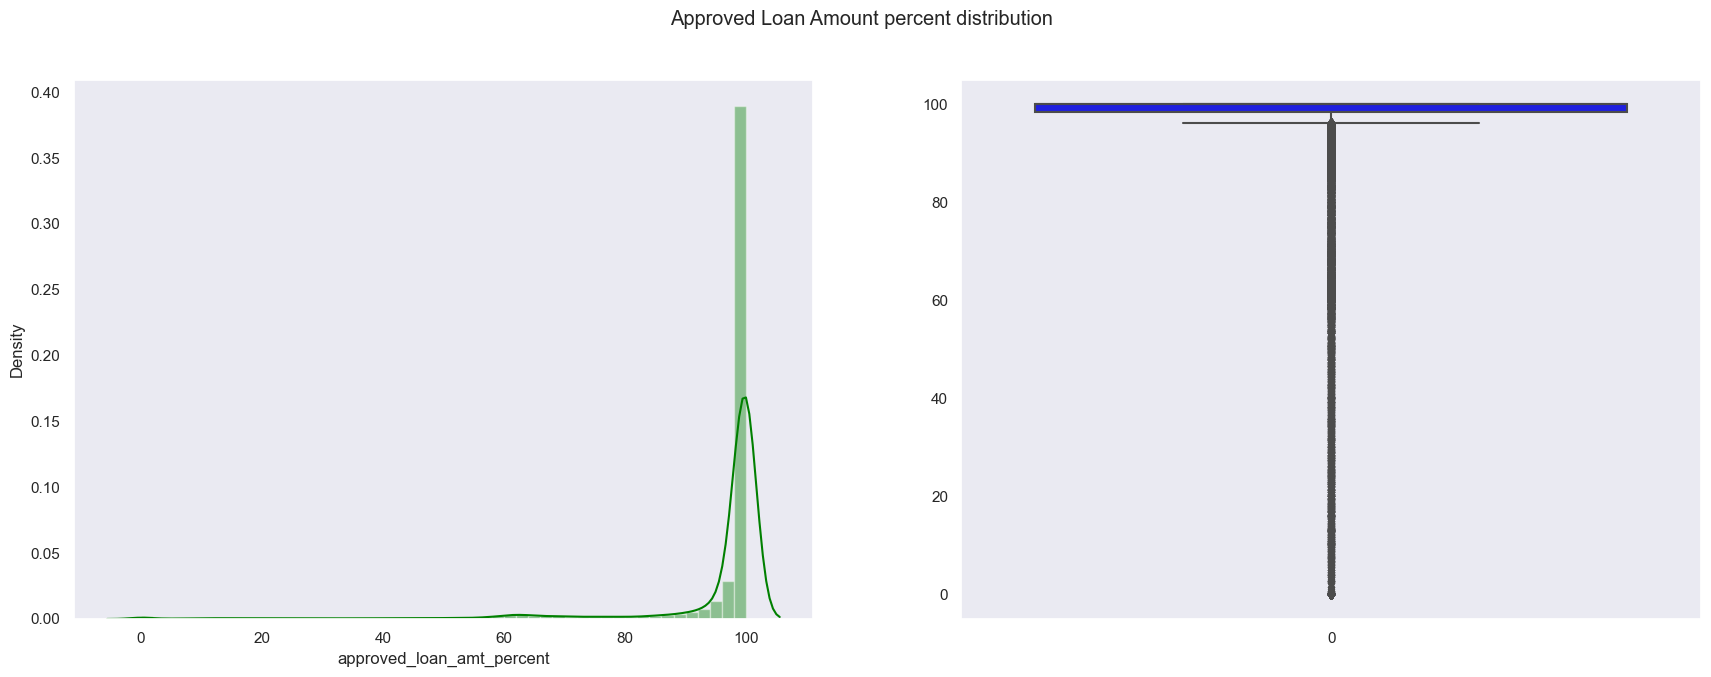

In [52]:
plt.figure(figsize=(21,7))
sns.set(style='dark',)
plt.subplot(1,2,1)
sns.distplot(a=data.approved_loan_amt_percent, color='green')
plt.subplot(1,2,2)
sns.boxplot(data=data.approved_loan_amt_percent, color='blue')
plt.suptitle('Approved Loan Amount percent distribution')
plt.show()

#### Observations
- 80% of Borrowers got 100% loan amount from investors.

### Analyzing Loan amount

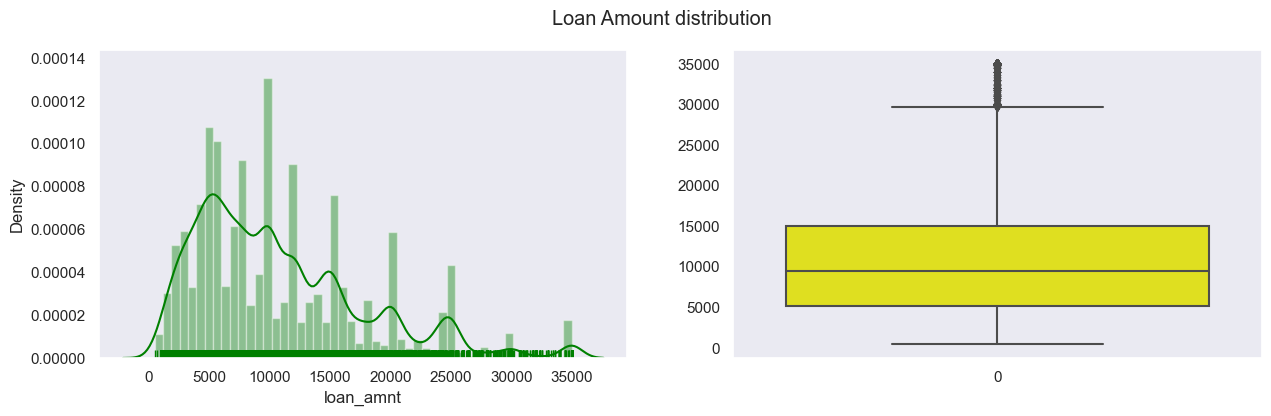

In [53]:
#Setting up the figure size of the plot
plt.figure(figsize=(15,4))

#Setting subplot index
plt.subplot(1,2,1)

#Distribution plot
sns.distplot(a=data.loan_amnt, rug=True, color='green')

#Setting subplot index
plt.subplot(1,2,2)

#Box plot
sns.boxplot(data=data.loan_amnt, color='yellow')

#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

##### Observations
- From loan amount data, we can say that most of them have taken their loan between 5000 and 15000.

### Analyzing Interest Rate

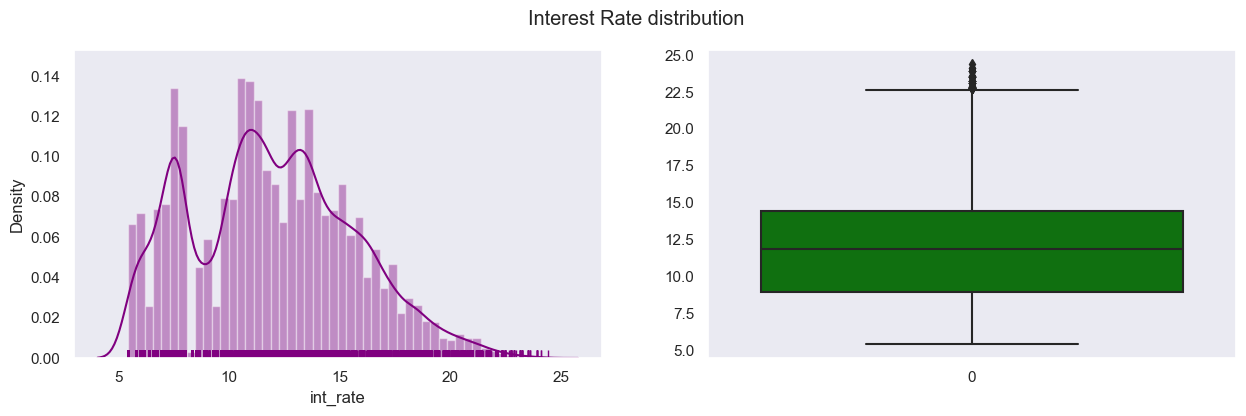

In [54]:
#Setting up the figure size of the plot
plt.figure(figsize=(15,4))

#Setting subplot index
plt.subplot(1,2,1)

#Distribution plot
sns.distplot(a=data.int_rate, rug=True, color='purple')

#Setting subplot index
plt.subplot(1,2,2)

#Box plot
sns.boxplot(data=data.int_rate, color='green')

#Single title for both subplots.
plt.suptitle('Interest Rate distribution')
plt.show()

#### Observations
- From interest rate data, we can say that most of the interest rate lies between 9% to 14.5%.

### Analyzing Annual Income

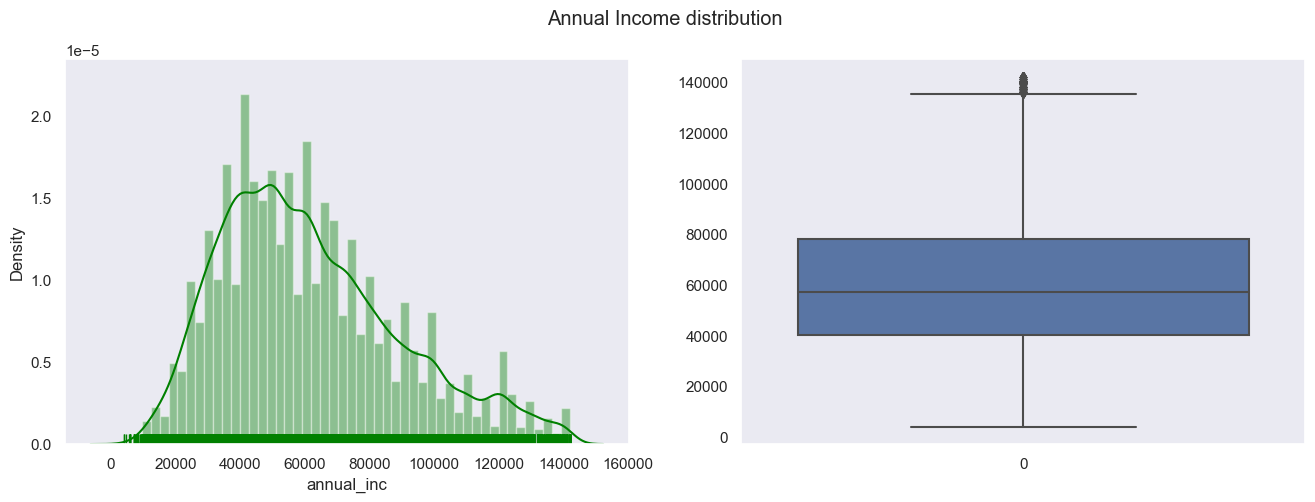

In [55]:
#Setting up the figure size of the plot
plt.figure(figsize=(16,5))

#Setting subplot index
plt.subplot(1,2,1)

#Distribution plot
sns.distplot(a=data.annual_inc, rug=True, color='Green')

#Setting subplot index
plt.subplot(1,2,2)

#Box plot
sns.boxplot(data=data.annual_inc)

#Single title for both subplots.
plt.suptitle('Annual Income distribution')
plt.show()

#### Observations
- From annual income data, we can say that most of the borrower's annual income are in range of 40k to 80k.

#### Converting the 'value_count' into percentage

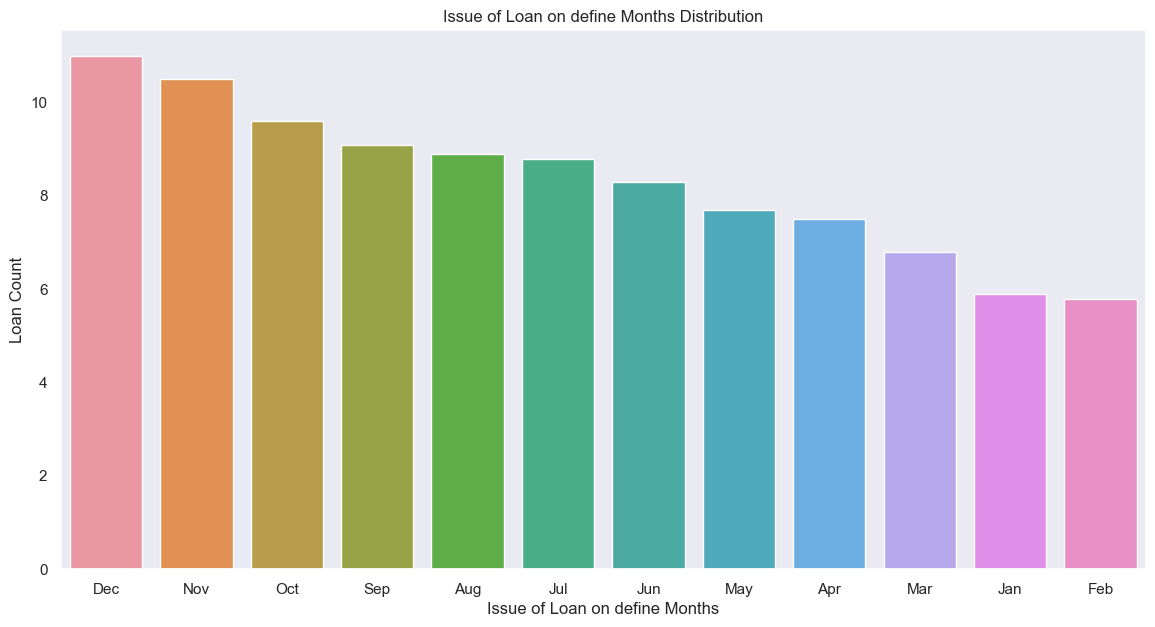

In [57]:
#converting value_count into percentage
ls = data["issue_d_month"].value_counts(normalize=True).mul(100).round(1).reset_index()
#barplot
plt.figure(figsize=(14,7))
sns.barplot(data=ls, x="index", y="issue_d_month")
plt.xlabel("Issue of Loan on define Months")
plt.ylabel('Loan Count')
plt.title('Issue of Loan on define Months Distribution')
plt.show()

#### Observations
- From Issue month data, we can say that issue of loan is increasing every month from jan to dec and in the final quarter of year there are more loan issued due to vacation.

#### Converting the 'value_count' into percentage

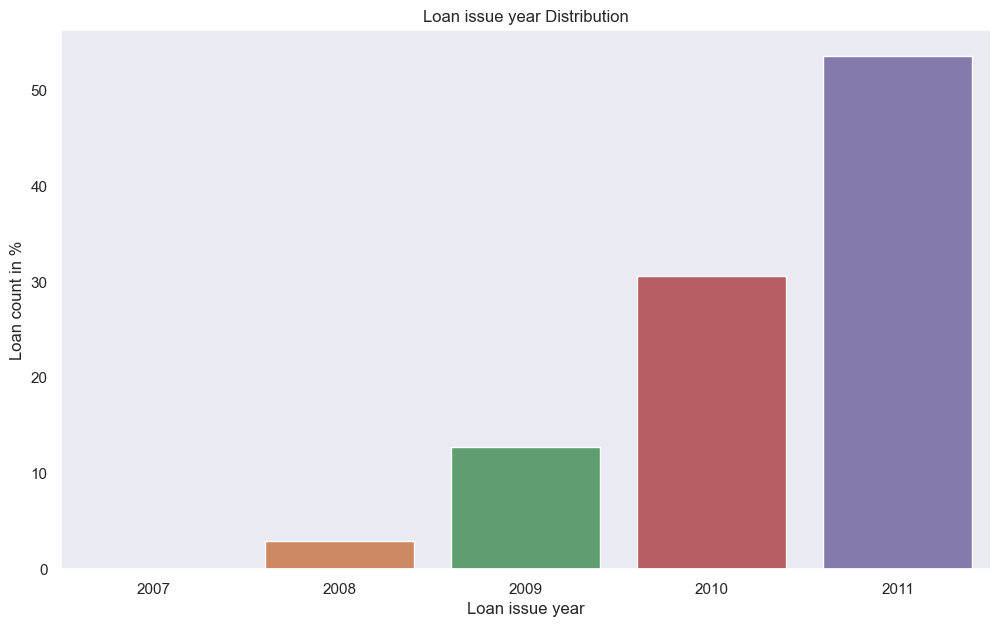

In [58]:
#converting value_count into percentage
ls = data["issue_d_year"].value_counts(normalize=True).mul(100).round(1).reset_index()
#barplot
plt.figure(figsize=(12,7))
sns.barplot(data=ls, x="index", y="issue_d_year")
plt.xlabel("Loan issue year")
plt.ylabel('Loan count in %')
plt.title('Loan issue year Distribution')
plt.show()

#### Observations
- From Issue year data, we can say that lending club has really expanded year by year, every year the number of loans are doubled.

## A) Unordered Categorical Variables

### Analyzing Loan Status

#### converting value_count into percentage

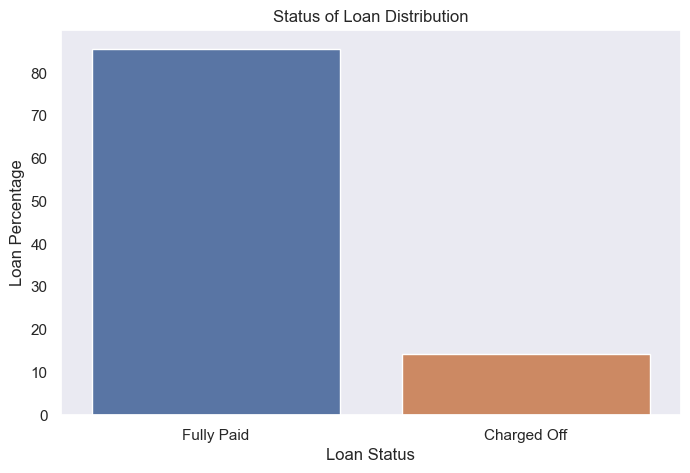

In [59]:
#converting value_count into percentage
ls = data["loan_status"].value_counts(normalize=True).mul(100).round(1).reset_index()
#barplot
plt.figure(figsize=(8,5))
sns.barplot(data=ls, x="index", y="loan_status")
plt.xlabel("Loan Status")
plt.ylabel('Loan Percentage')
plt.title('Status of Loan Distribution')
plt.show()

#### Observations 
- From loan status data, we can say that 85.7% have fully paid whereas 14.3% are charged off.

### Analyzing Purpose of Loan

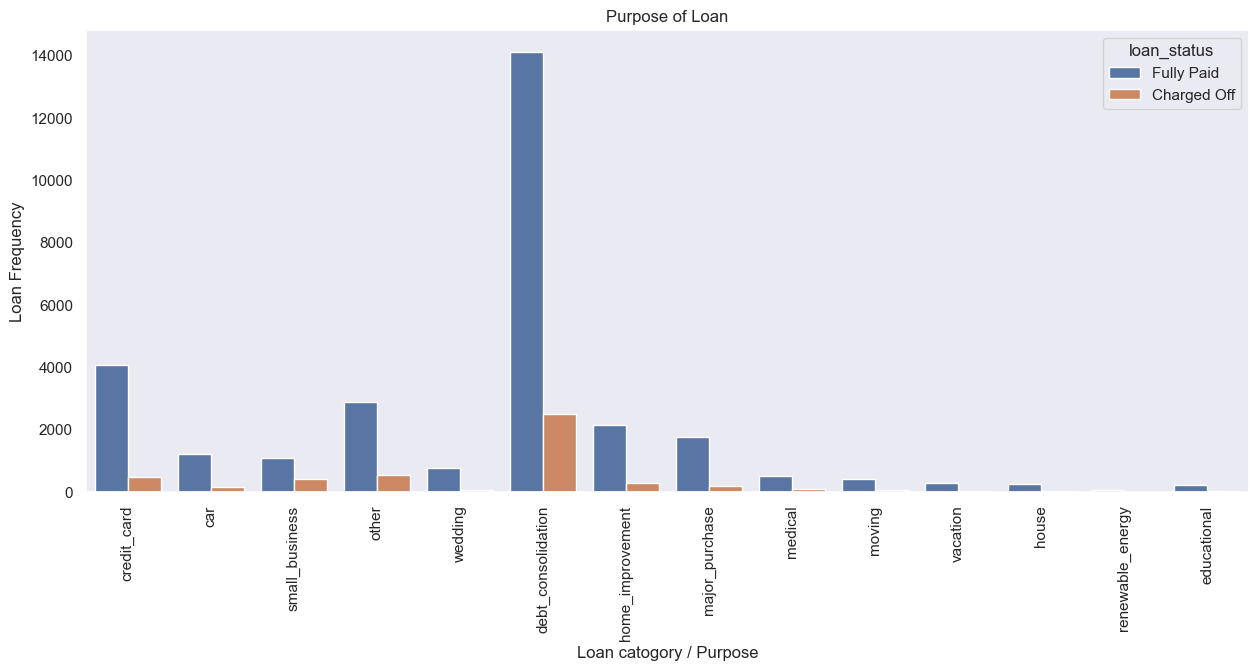

In [60]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x="purpose", data=data, hue= 'loan_status')
ax.set_title('Purpose of Loan')
ax.set_ylabel('Loan Frequency')
ax.set_xlabel('Loan catogory / Purpose')  
plt.xticks(rotation=90)
plt.show()

####  Observations
- From purpose data, we can say that most of them have taken loan for <b>Debt Consolidation</b> and paying credit card bills.
- Charged Off loan status is also high for debt consolidation.

### Analyzing Home Ownership

<Figure size 2000x800 with 0 Axes>

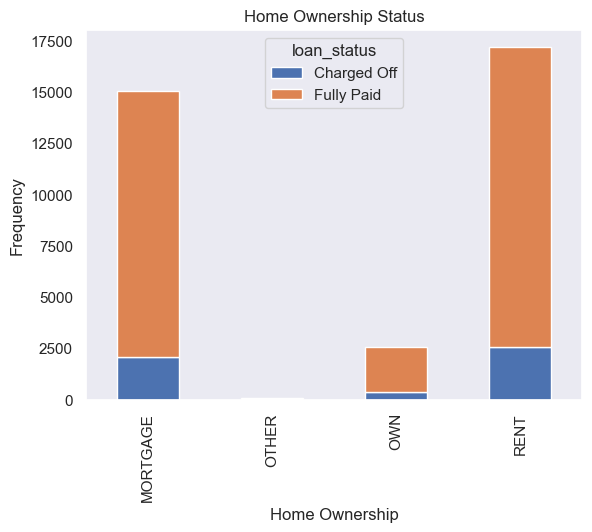

In [61]:
plt.figure(figsize=(20,8))
data.groupby('home_ownership')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True)
plt.title("Home Ownership Status",fontdict={'fontsize':12})
plt.xlabel("Home Ownership")
plt.ylabel("Frequency")
plt.show()

####  Observations
- From home ownership data, we can say that most of them have taken loan who are in rent or mortgage their home.
- Charged Off loan status is also high for these two home ownership.

## B) Ordered Categorical Variables

### Analyzing Loan paying term

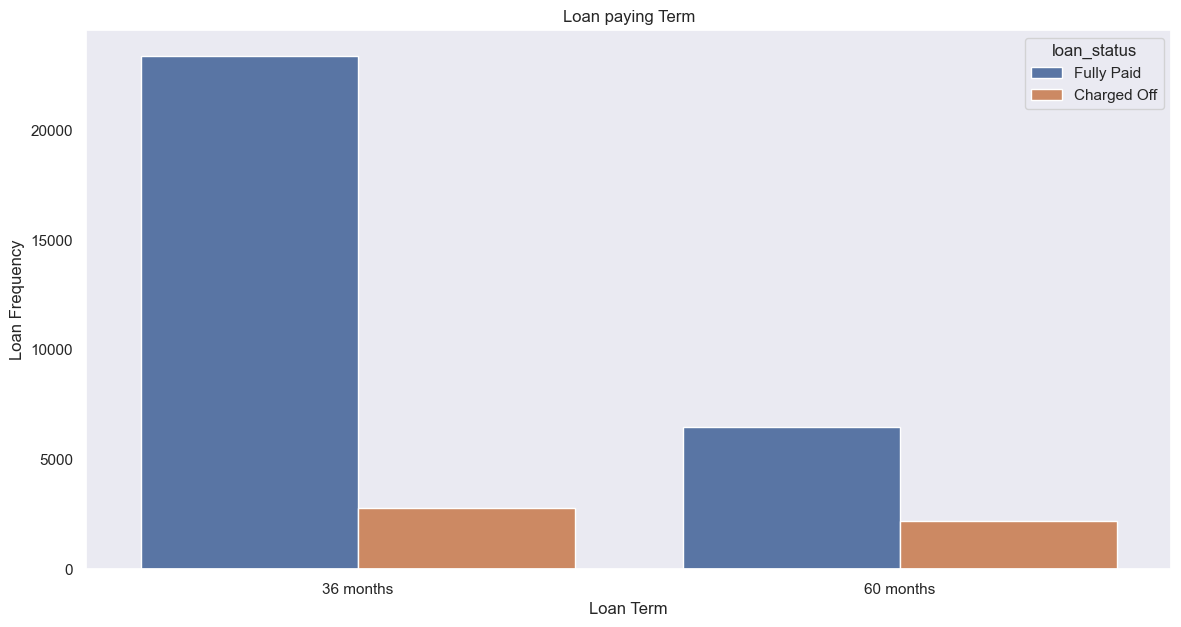

In [62]:
plt.figure(figsize=(14,7))
ax = sns.countplot(x="term", data=data, hue= 'loan_status')
ax.set_title('Loan paying Term')
ax.set_ylabel('Loan Frequency')
ax.set_xlabel('Loan Term')  
plt.show()

####  Observations
- From the above Loan Paying Term data, we can say that there are 2 loan terms and most of the borrowers took 36 months tenure.
- But the ratio of charged off is high in 60 months tenure.

# 5) Segmented Univariate Analysis

### Loan Amount distribution with respect to loan status

<Figure size 1400x800 with 0 Axes>

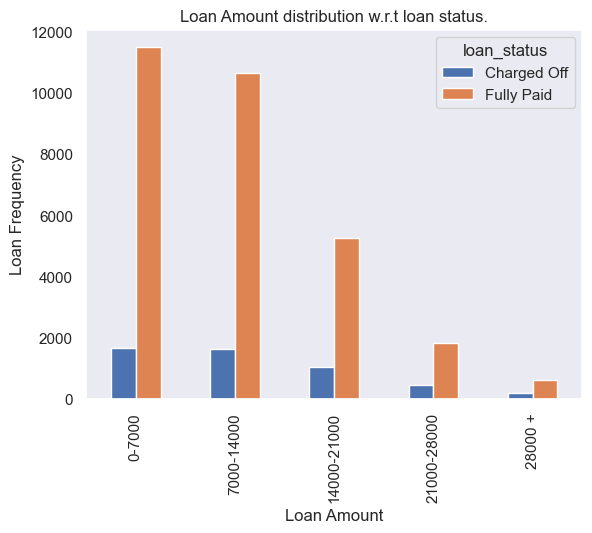

In [63]:
# Loan Amount distribution with respect to loan status
plt.figure(figsize=(14,8))
data.groupby('loan_amnt_bin')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.title("Loan Amount distribution w.r.t loan status.")
plt.xlabel("Loan Amount")
plt.ylabel("Loan Frequency")
plt.show()

#### Observations
- From above we can say that, under 14k most of the borrowers take the loan amount and charged off status is also high for those amount.

### Annual Income distribution with respect to loan status

<Figure size 1400x800 with 0 Axes>

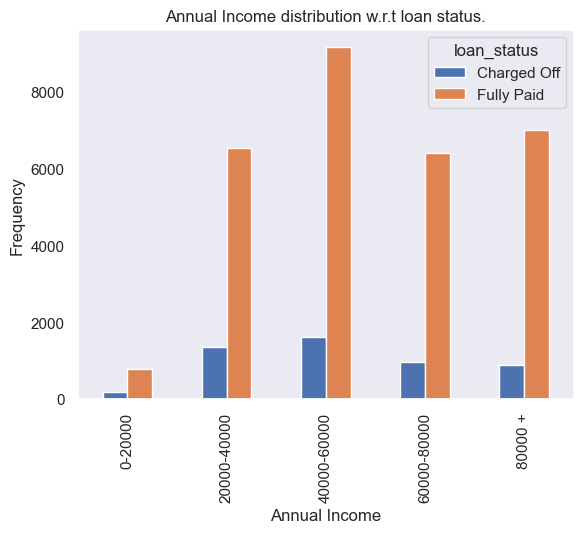

In [64]:
# Annual Income distribution with respect to loan status
plt.figure(figsize=(14,8))
data.groupby('annual_inc_bin')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.title("Annual Income distribution w.r.t loan status.")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.show()

#### Observations
- From above chart we can say that, most of the borrower's annual income is in the range of 40k to 60k.

### Below is the home ownership and loan purpose for defaulted

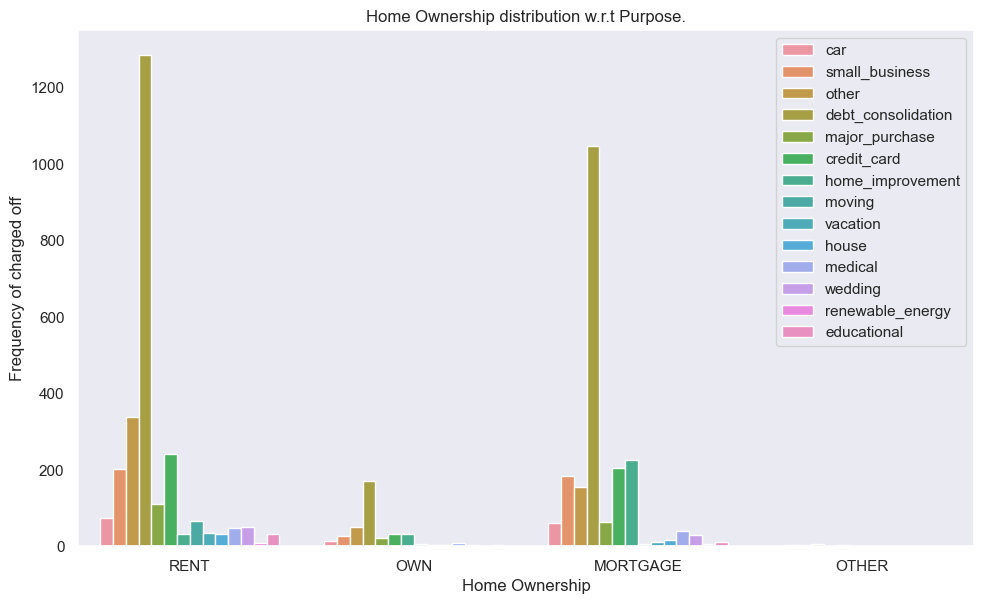

In [65]:
#home ownership and loan purpose for defaulted
plt.figure(figsize=(10,6))
sns.countplot(x='home_ownership',hue= 'purpose',data=data[data['loan_status']=='Charged Off'])
plt.tight_layout()
plt.title("Home Ownership distribution w.r.t Purpose.")
plt.xlabel("Home Ownership")
plt.ylabel("Frequency of charged off")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

#### Observations
- From above chart we can say that, most of the borrower's who took loan for the purpose of debt consolidation has highest number of Charged off status and those who are in rent as the most.

# 6) Bivariate Analysis

Let's analyse <b>Loan amount</b> with every variables.

### Analyse Loan amount with "Loan Term vs Loan amount" and "Verify Status vs Loan amount"

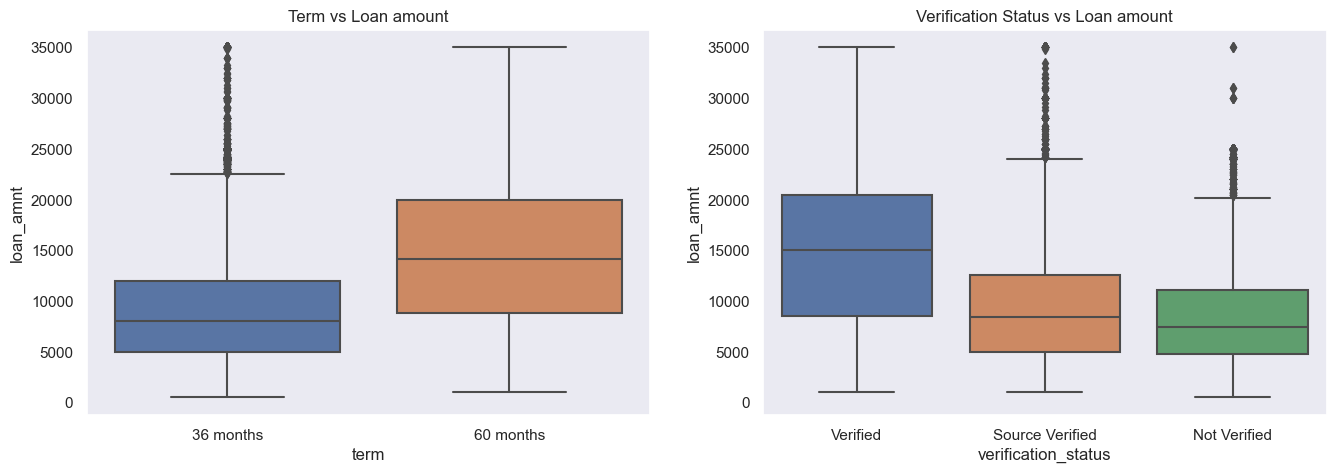

In [66]:
 # Analyse Loan amount with Term vs Loan amount & Verify Status vs Loan amount
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="loan_amnt", data=data)
plt.title("Term vs Loan amount")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="loan_amnt", data=data)
plt.title("Verification Status vs Loan amount")
plt.show()

#### Observations
- In loan amount vs term variable we can say that, more the loan amount higher is the tenure i.e. 60 months. Its median is only 15k whereas the median of 36 month is 8k.
- In Verification status vs loan amount we can say that, Verified borrower gets more loan amount than Non-verified and Source Verified i.e. above 10k loan amount everyone are verified.

### Analyse Loan amount with "Loan status vs Loan amount" and "Grade vs Loan amount"

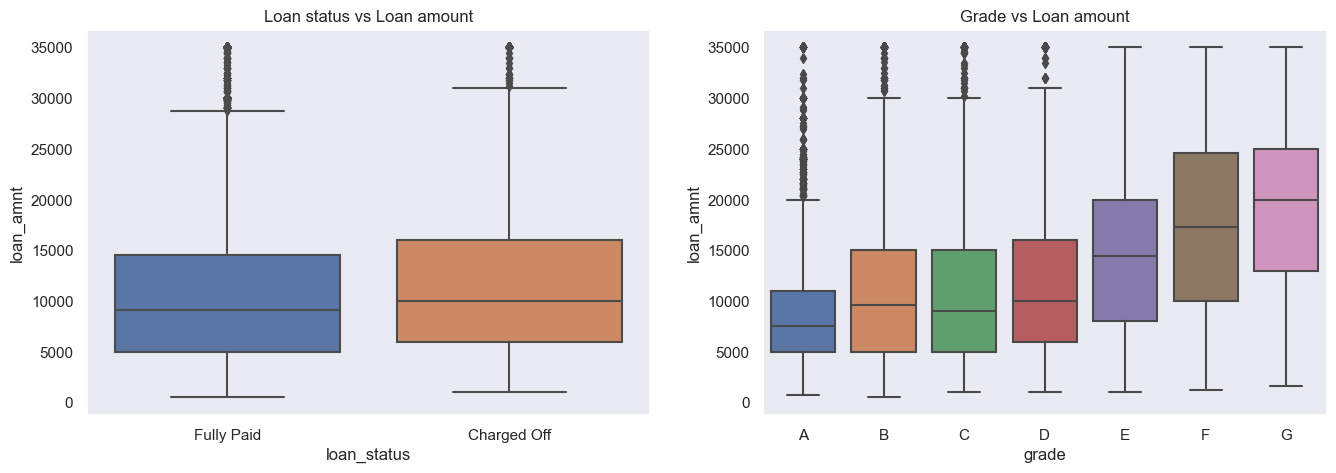

In [67]:
# Analyse Loan amount with "Loan status vs Loan amount" and "Grade vs Loan amount"
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="loan_amnt", data=data)
plt.title("Loan status vs Loan amount")
plt.subplot(1,2,2)
#arranging grade in alphabetically ascending order
grade_order = data["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="loan_amnt", order= grade_order, data=data)
plt.title("Grade vs Loan amount")
plt.show()

#### Observations
- In loan amount vs Loan status variable we can say that, charged off were having higher loan amount than fully paid.
- In Grade vs loan amount we can say that, grade F & G are having max amount of loan. As the grade decreases amount of loan is increasing.
- From this we can say that higher the grade more is the risk of default.

### Analyse Loan amount with "Home Ownership vs Loan amount"

Text(0.5, 1.0, 'Home Ownership vs Loan amount')

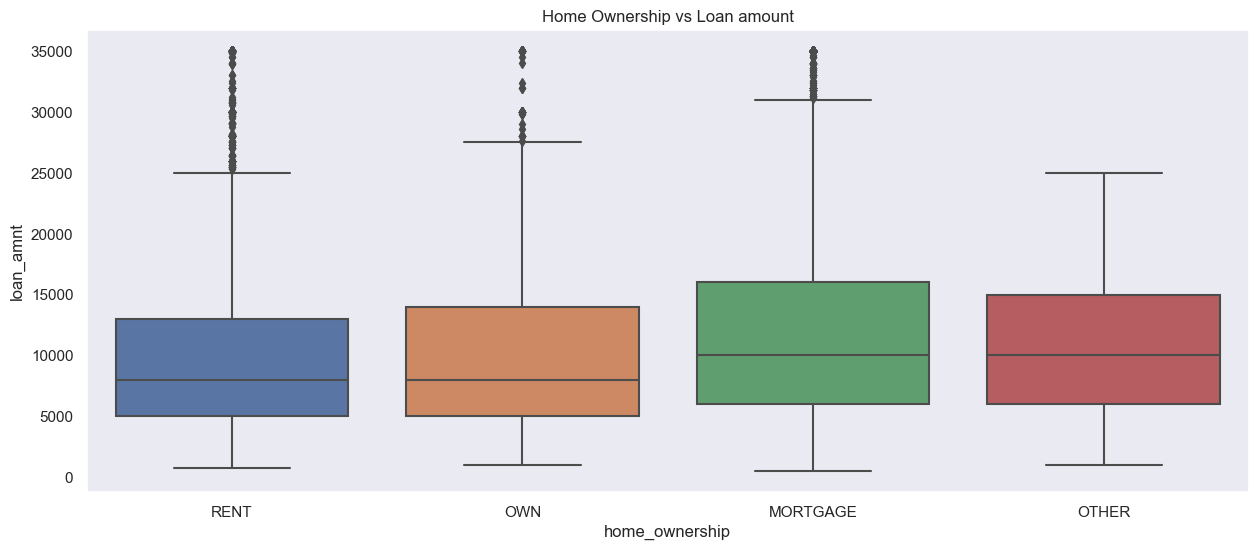

In [68]:
# Analyse Loan amount with "Home Ownership vs Loan amount"
plt.figure(figsize=(15,6))
sns.boxplot(x="home_ownership", y="loan_amnt", data=data)
plt.title("Home Ownership vs Loan amount")

#### Observations
- In loan amount vs home ownership variable we can say that, the borrower who are from Mortgage have taken higher amount of loan then the others.

### Analyse Loan amount with "Purpose of Loan vs Loan amount"

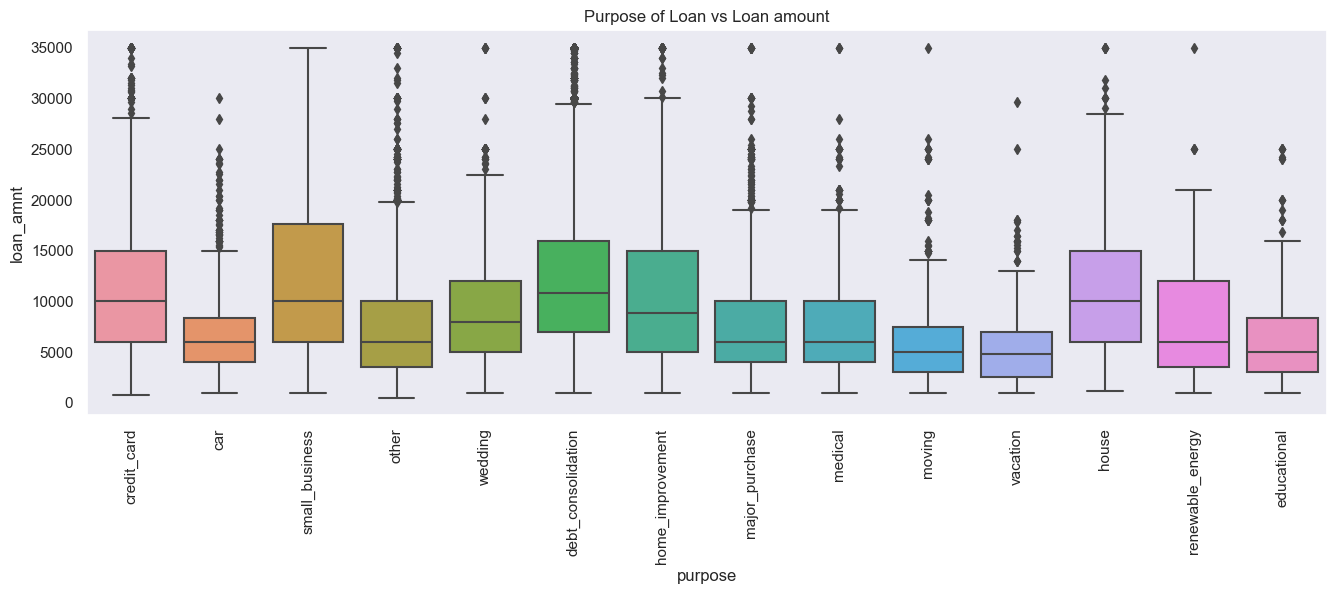

In [69]:
# Analyse Loan amount with "Purpose of Loan vs Loan amount"
plt.figure(figsize=(16,5))
sns.boxplot(x="purpose", y="loan_amnt", data=data)
plt.title("Purpose of Loan vs Loan amount")
plt.xticks(rotation=90)
plt.show()

#### Observations
- In loan amount vs purpose variable we can say that, to startup with small business borrowers are taking high loan than others. Then comes debt_consolidation is second and Credit card comes 3rd.
- Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes.

### Analyse Loan amount with "Employee Length(years of experience) vs Loan amount"

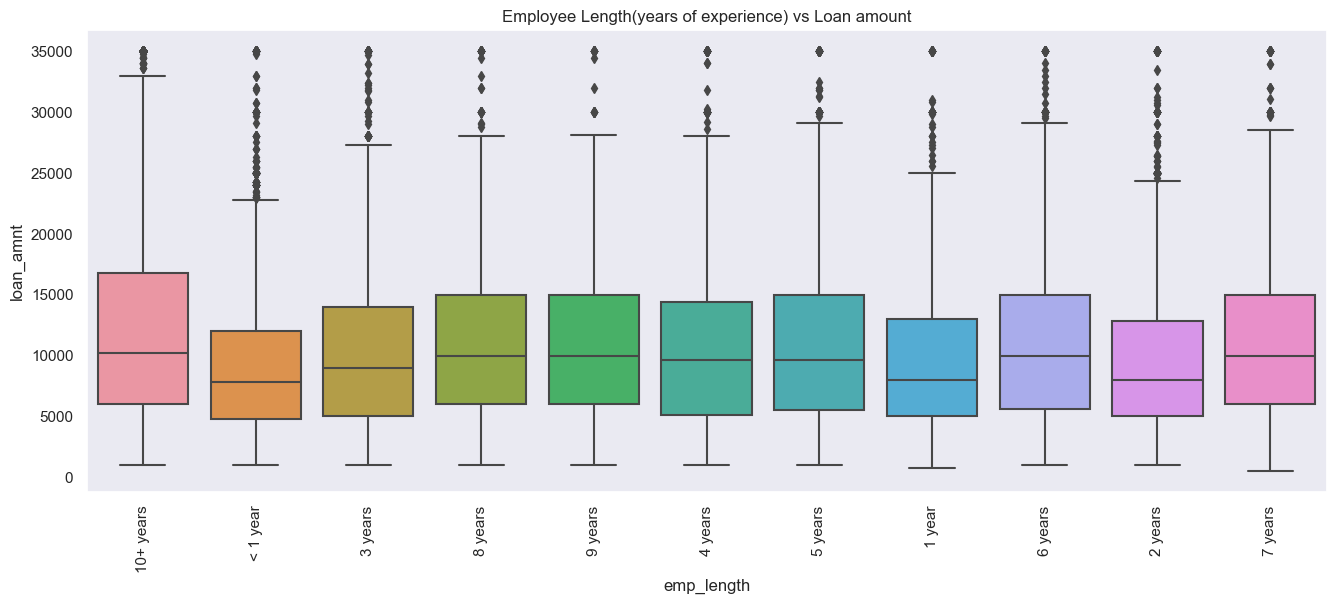

In [70]:
# Analyse Loan amount with "Employee Length(years of experience) vs Loan amount"

plt.figure(figsize=(16,6))
sns.boxplot(x="emp_length", y="loan_amnt", data=data)
plt.title("Employee Length(years of experience) vs Loan amount")
plt.xticks(rotation=90)
plt.show()

#### Observations
- In loan amount vs employee length variable we can say that, the borrower who has 10+ years of experience are taking high amount of loan than others and borrowers with less than 1 year of experience are taking lesser amount of loan compared to others. 

### Analyse Loan amount with "Issue Month vs Loan amount" with "Issue Year vs Loan amount"

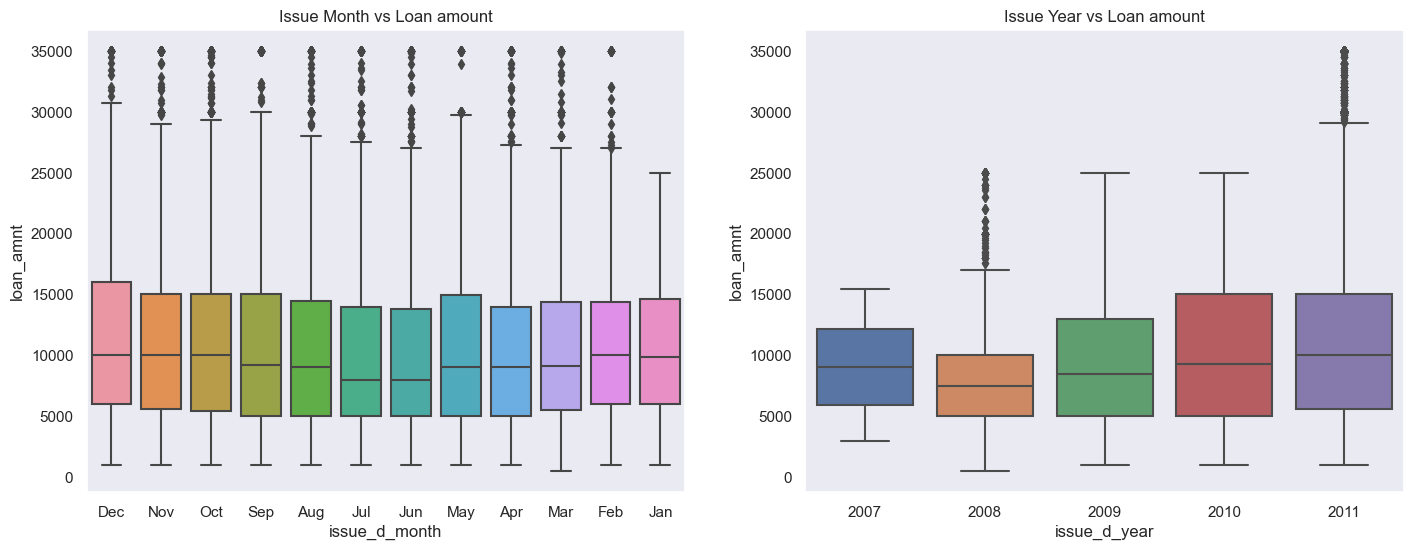

In [71]:
# Compare "Issue Month vs Loan amount" with "Issue Year vs Loan amount"
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
sns.boxplot(x="issue_d_month", y="loan_amnt", data=data)
plt.title("Issue Month vs Loan amount")
plt.subplot(1,2,2)
sns.boxplot(x="issue_d_year", y="loan_amnt", data=data)
plt.title("Issue Year vs Loan amount")
plt.show()

#### Observations
- In loan amount vs issue month variable we can say that, highest loan amount is taken in the month of Dec and May whereas median value doesn't vary too much.
- In Issue year vs loan amount we can say that, highest loan amount is taken in the year 2008 and 2011 as we can see in outliers by some borrowers. And we can say that median value doesn't vary too much but as the year increases high amount of loans are taken.

### Analyse Loan amount with Loan Amount vs Issue month vs Issue year to verify the frequency

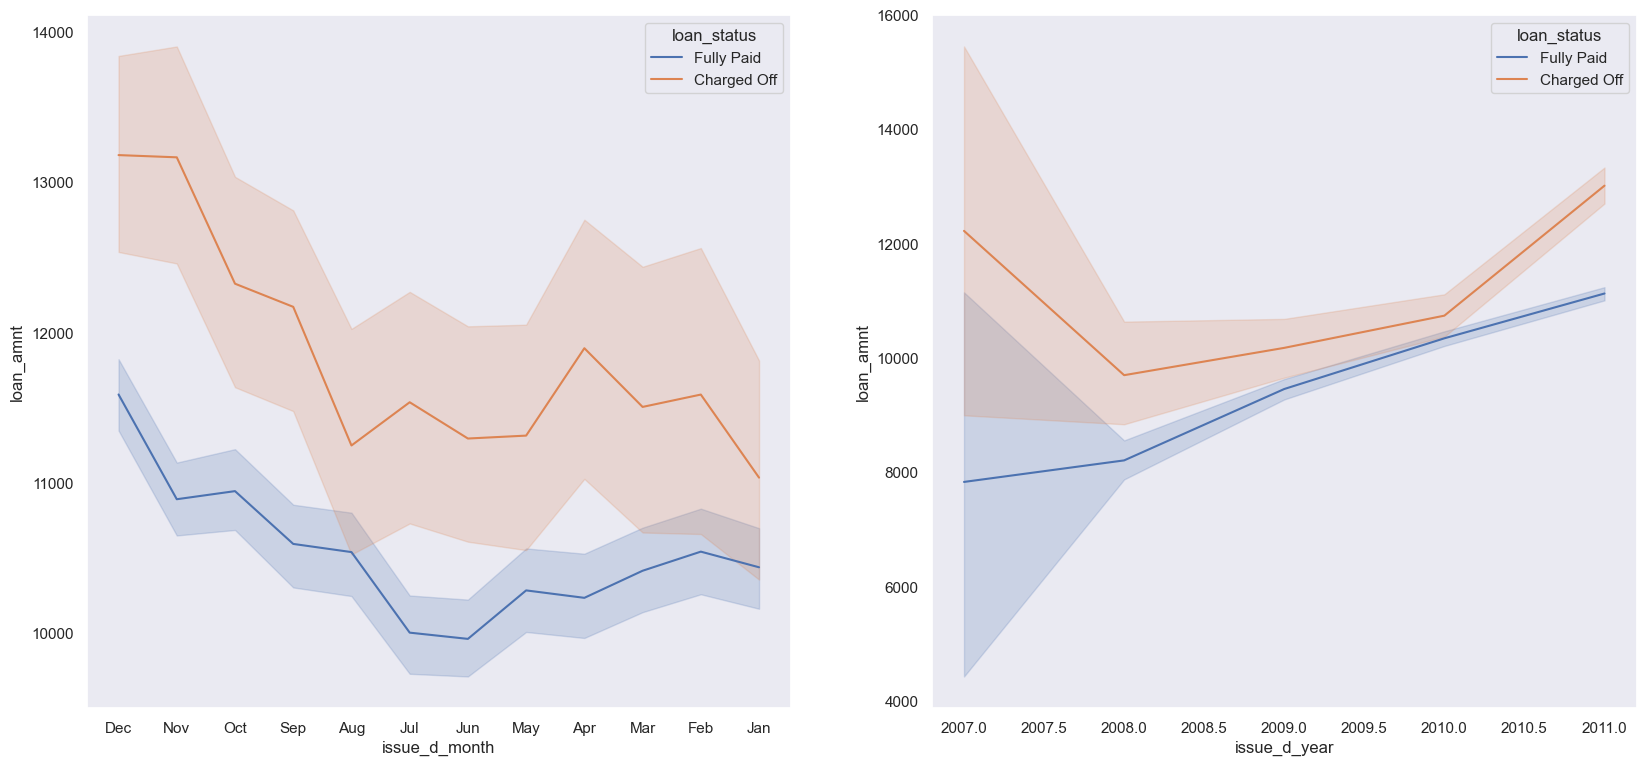

In [72]:
# Compare Loan Amount vs Issue month vs Issue year to verify the frequency
plt.figure(figsize=(20,9))
plt.subplot(121)
sns.lineplot(data =data ,y='loan_amnt', x='issue_d_month', hue ='loan_status')
plt.subplot(122)
sns.lineplot(data =data ,y='loan_amnt', x='issue_d_year', hue ='loan_status')
plt.show()

#### Observations
- From above lineplot we can say that, higher the loam amount, more is the charged off frequency.
- And the borrower who took the loan in the month of november and december are having highest charged off ratio with highest loan amount.

Let's analyse <b>Annual Income</b> with every variables.

### Analyse Annual Income with "Term vs Annual Income" and "Verification Status vs Annual Income"

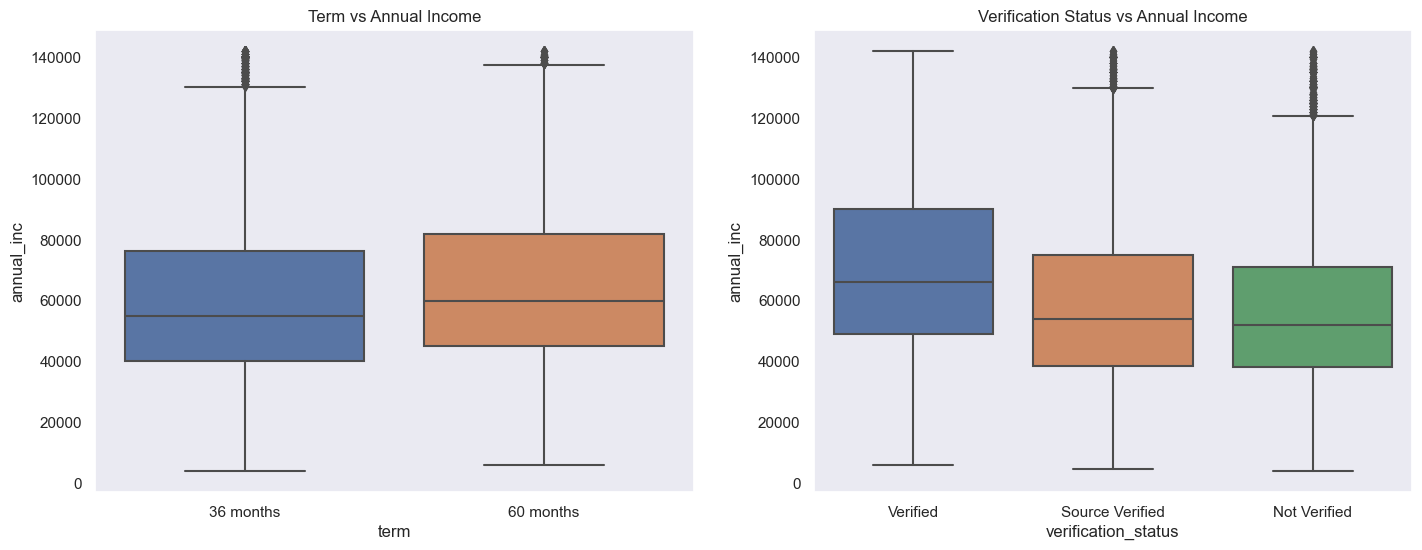

In [73]:
# Analyse Annual Income with "Term vs Annual Income" and "Verification Status vs Annual Income"
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="annual_inc", data=data)
plt.title("Term vs Annual Income")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="annual_inc", data=data)
plt.title("Verification Status vs Annual Income")
plt.show()

#### Observations
- In Term vs Annual Income variable we can say that, the borrowers who have high annual income are taking loans for 60 months tenure as compared to 36 months.
- In Verification status vs annual income we can say that, mostly the verified borrowers are having high annual income than others.

### Analyse Annual Income with "Loan status vs Annual Income" and "Grade vs Annual Income"

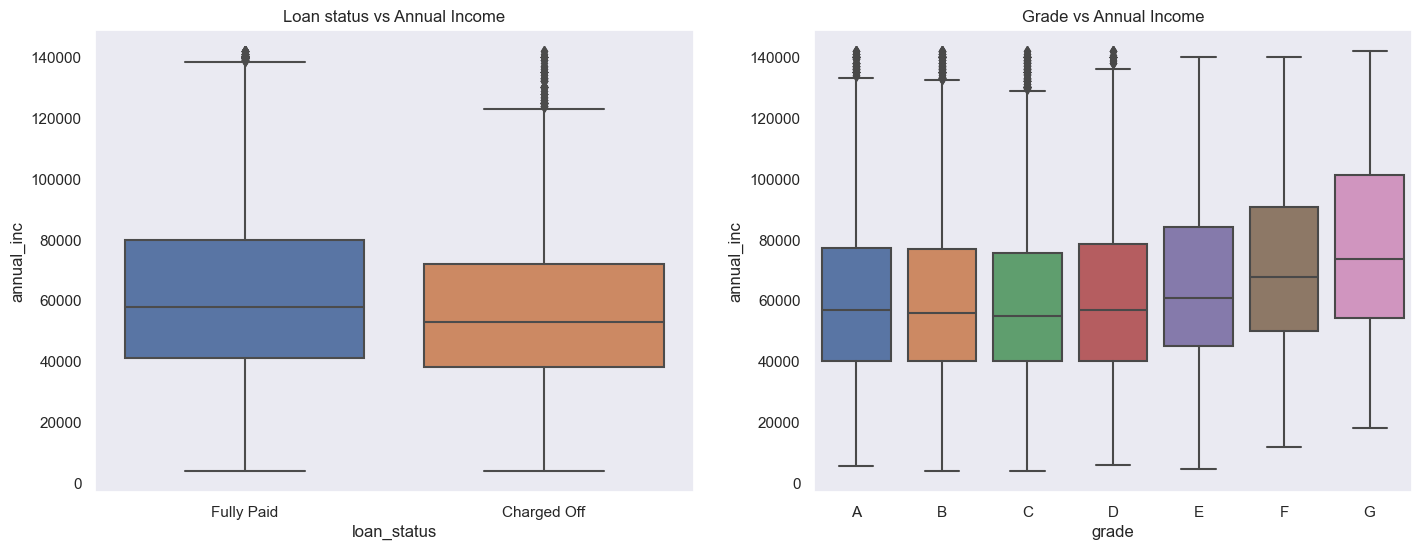

In [74]:
# Analyse Annual Income with "Loan status vs Annual Income" and "Grade vs Annual Income"
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="annual_inc", data=data)
plt.title("Loan status vs Annual Income")
plt.subplot(1,2,2)
#arranging grade in alphabetically ascending order
grade_order = data["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="annual_inc", order= grade_order, data=data)
plt.title("Grade vs Annual Income")
plt.show()

#### Observations
- In loan amount vs term variable we can say that, more the loan amount higher is the tenure i.e. 60 months. Its median is only 15k whereas the median of 36 month is 8k.
- In Verification status vs loan amount we can say that, Verified borrower gets more loan amount than Non-verified and Source Verified i.e. above 10k loan amount everyone are verified.

### Analyse Annual Income with "Home Ownership vs Annual Income"

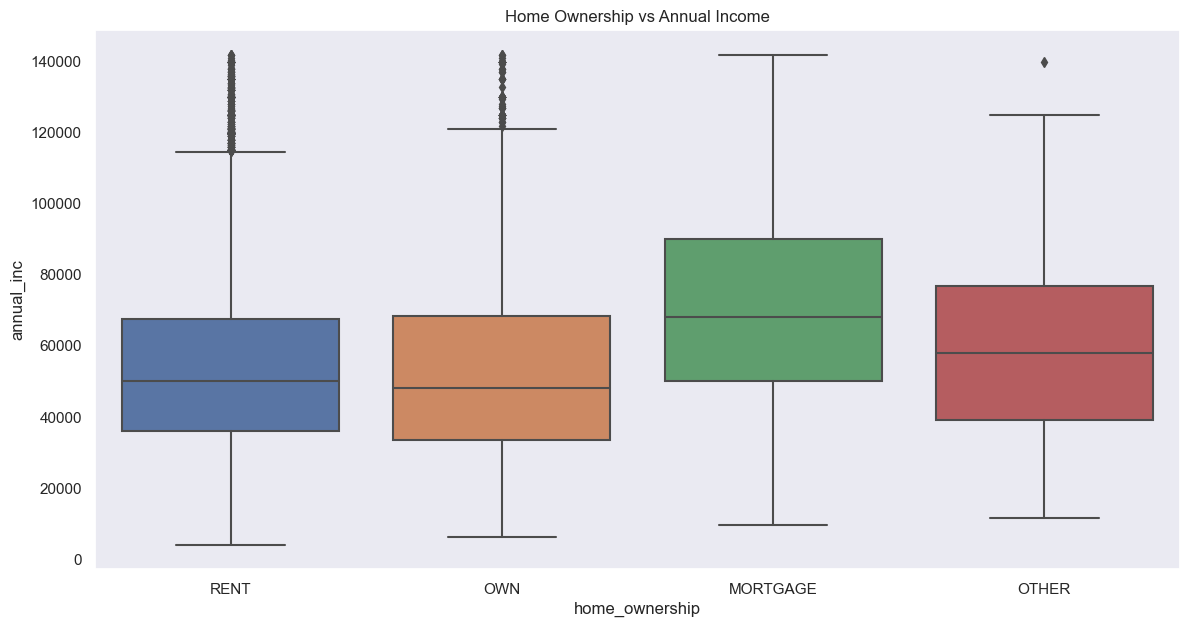

In [75]:
# Analyse Annual Income with "Home Ownership vs Annual Income"
plt.figure(figsize=(14,7))
sns.boxplot(x="home_ownership", y="annual_inc", data=data)
plt.title("Home Ownership vs Annual Income")
plt.show()

#### Observations
- In Annual Income vs Home Ownership variable we can say that, the borrowers who have the status as Mortgage are having high annual income than others.

### Analyse Annual Income with "Purpose of loan vs Annual Income"

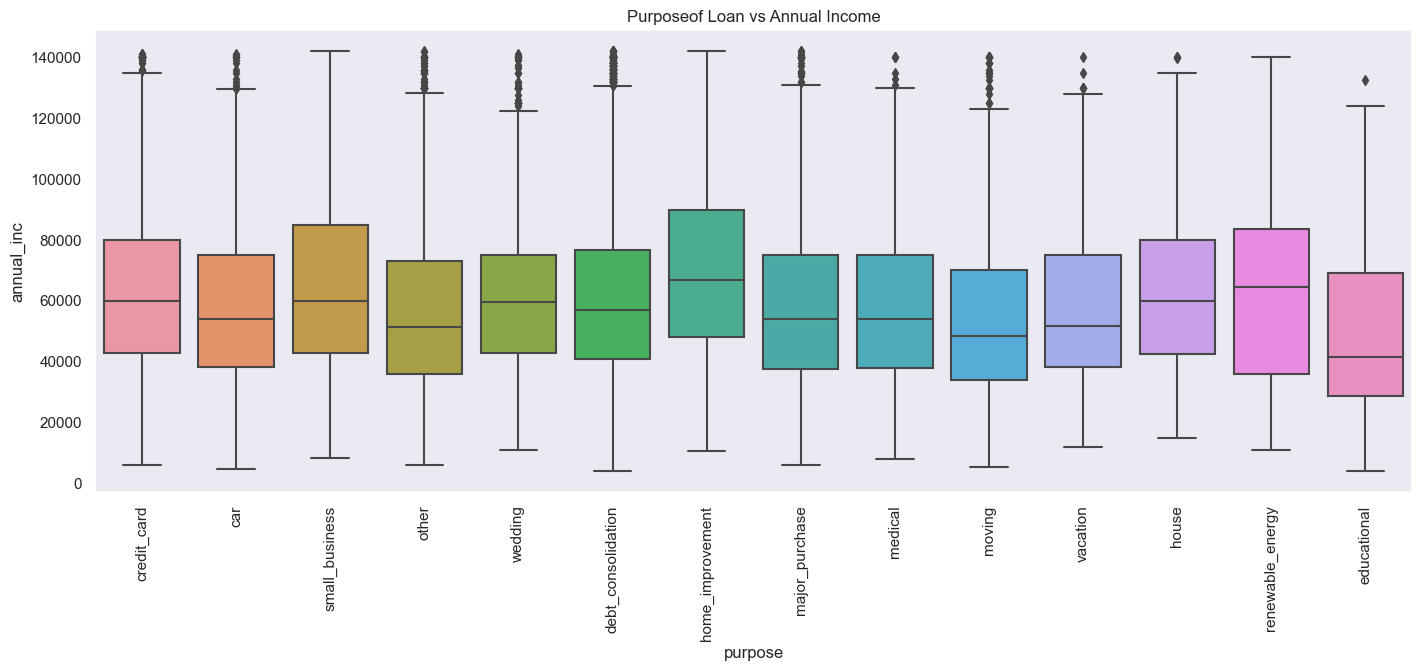

In [76]:
 # Analyse Annual Income with "Purpose of loan vs Annual Income"
plt.figure(figsize=(17,6))
sns.boxplot(x="purpose", y="annual_inc", data=data)
plt.title("Purposeof Loan vs Annual Income")
plt.xticks(rotation=90)
plt.show()

#### Observations
- In Annual Income vs Purpose variable we can say that, the borrowers who has high annual income are taking loans mostly for home improvement and small business.

### Analyse Annual Income with "Employee Length vs Annual Income"

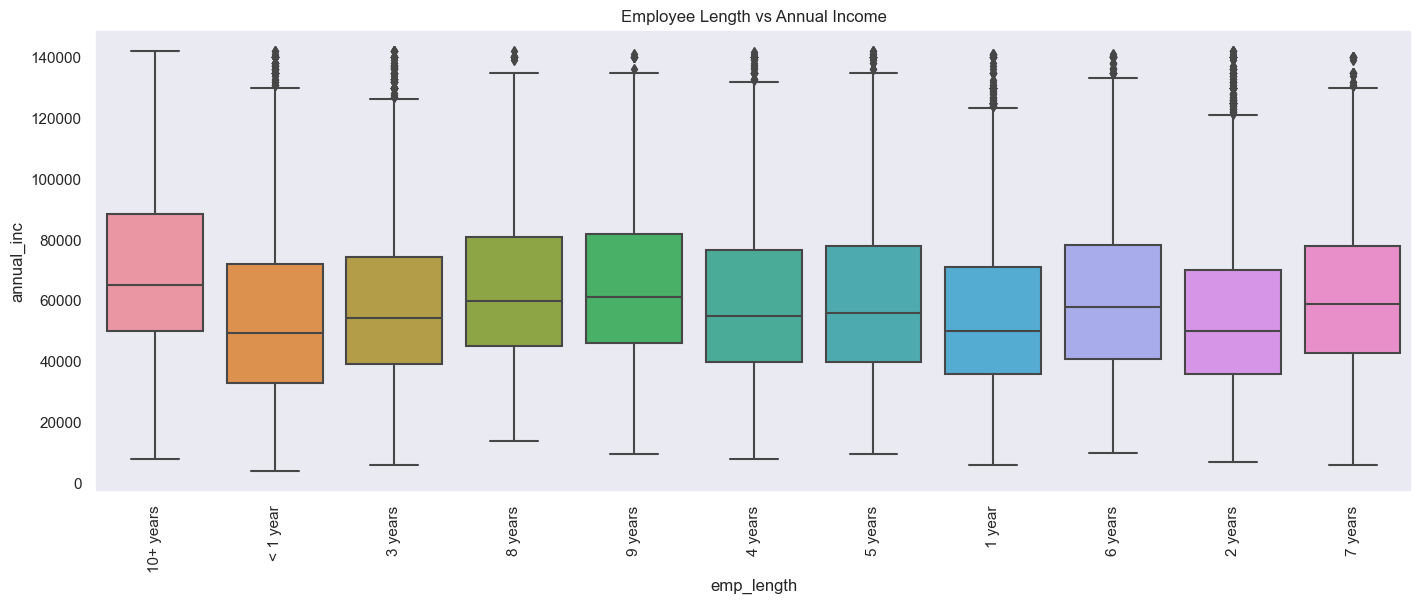

In [77]:
# Compare "Employee Length vs Annual Income"
plt.figure(figsize=(17,6))
sns.boxplot(x="emp_length", y="annual_inc", data=data)
plt.title("Employee Length vs Annual Income")
plt.xticks(rotation=90)
plt.show()

#### Observations
- In Annual income vs employee length variable we can say that, as we expected the borrowers who has 10+ experience are having highest annual income than others and >1 is having least.

Let's segment <b>Interest Rate</b> with every variables.

### Segment Interest Rate with "Term vs Interest Rate" and "Verification Status vs Interest Rate"

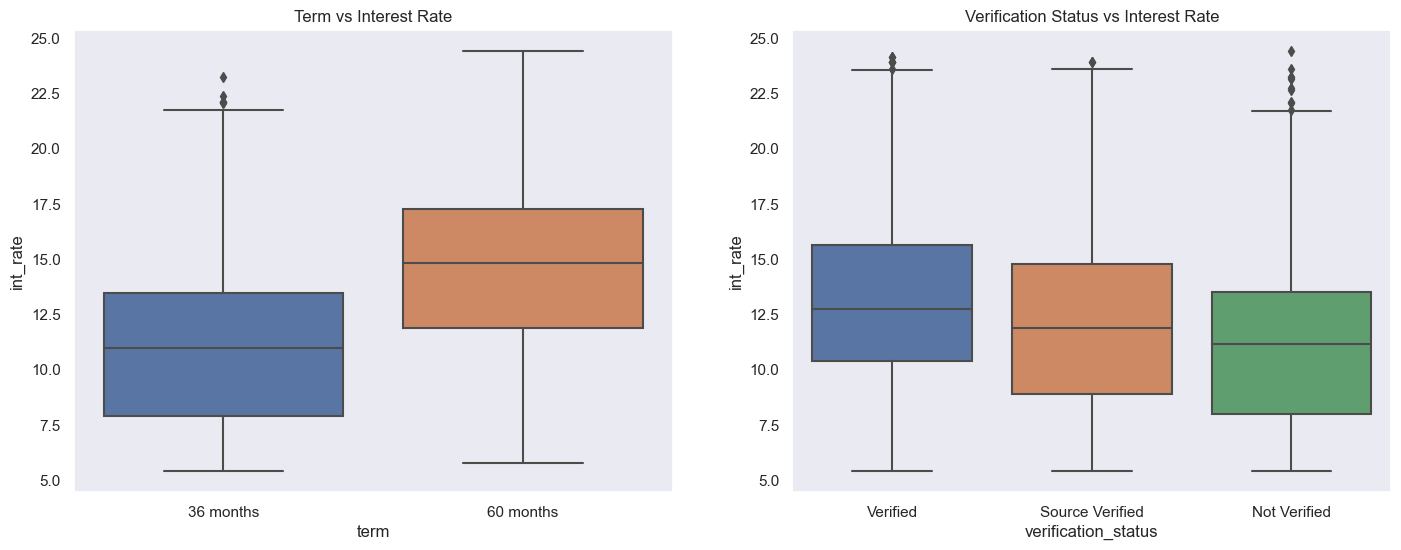

In [78]:
# Segment Interest Rate with "Term vs Interest Rate" and "Verification Status vs Interest Rate"
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="int_rate", data=data)
plt.title("Term vs Interest Rate")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="int_rate", data=data)
plt.title("Verification Status vs Interest Rate")
plt.show()

#### Observations
- In term vs interest rate variable we can say that, interest rate is less for those who take loan for 36 months and high for 60 months. 
- In Verification Status vs interest rate variable we can say that, Verified borrower gets more loan at higher interest rate compared to others.

### Segment Interest Rate with "Loan status vs Interest Rate" and "Grade vs Interest Rate"

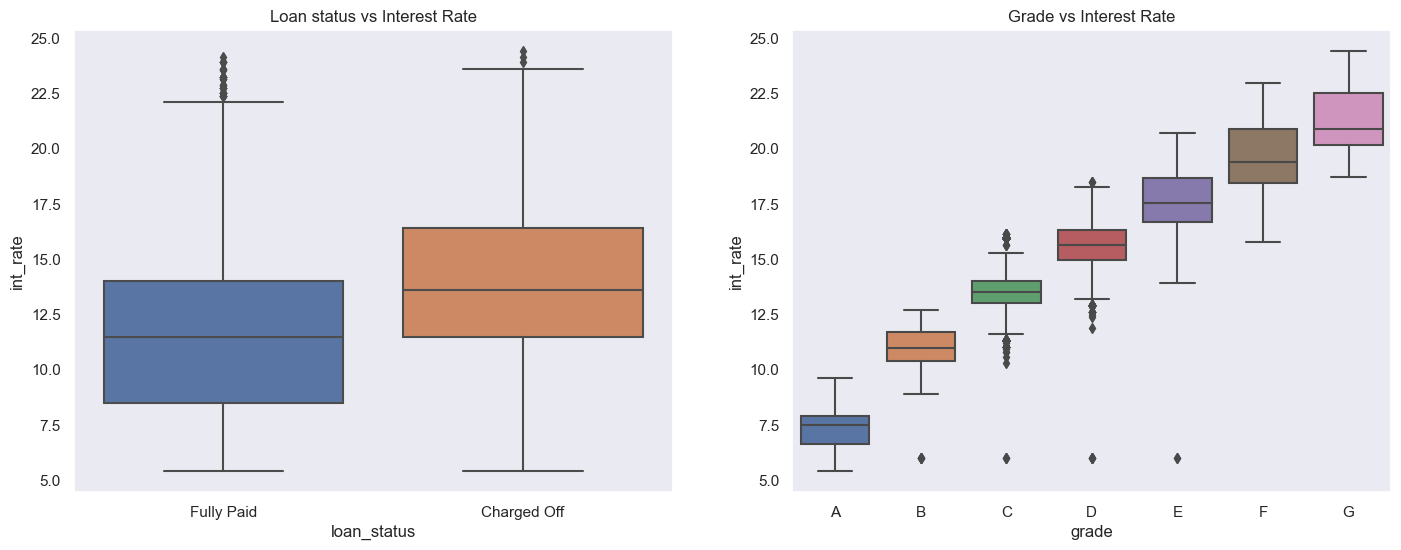

In [79]:
# Segment Interest Rate with "Loan status vs Interest Rate" and "Grade vs Interest Rate"

plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="int_rate", data=data)
plt.title("Loan status vs Interest Rate")
plt.subplot(1,2,2)
#arranging grade in alphabetically ascending order
grade_order = data["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="int_rate", order= grade_order, data=data)
plt.title("Grade vs Interest Rate")
plt.show()

#### Observations
- In loan status vs interest rate variable we can say that, the borrowers who has high interest rate are mostly defaulters.
- In grade vs interest rate we can say that, as the grade decreases, interest rate is also increasing.

### Segment Interest Rate with "Home Ownership vs Interest Rate"

Text(0.5, 1.0, 'Home Ownership vs Interest Rate')

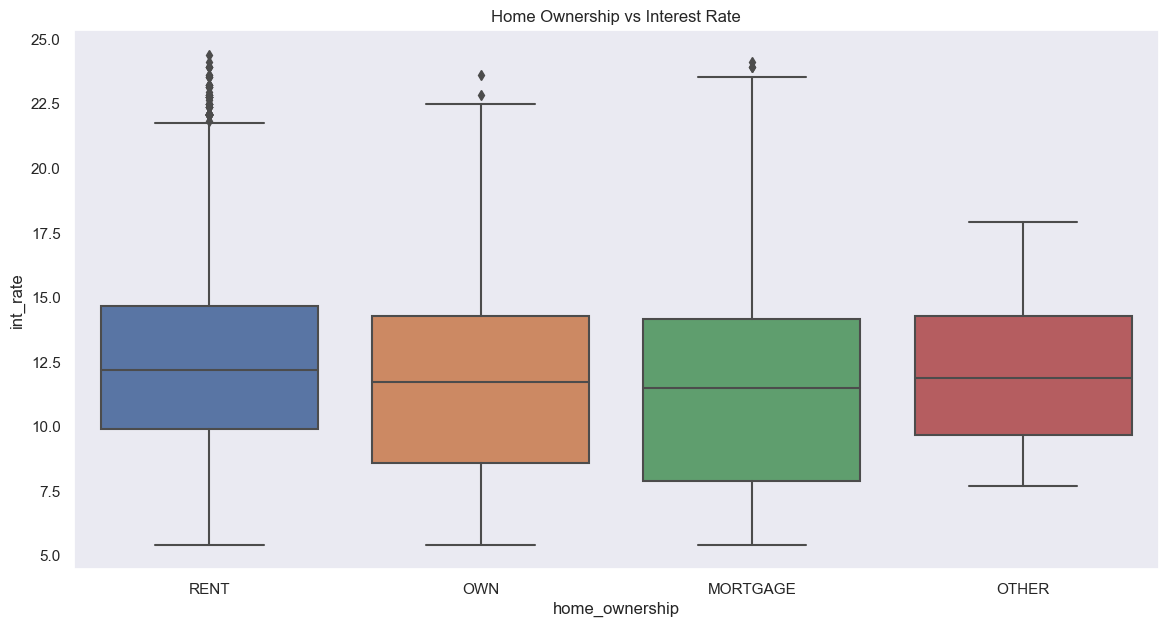

In [80]:
# Segment Interest Rate with "Home Ownership vs Interest Rate"

plt.figure(figsize=(14,7))
sns.boxplot(x="home_ownership", y="int_rate", data=data)
plt.title("Home Ownership vs Interest Rate")

#### Observations
- In home ownership vs interest rate variable we can say that, the borrowers who are in rent are getting high interest rate. The borrowers with own and mortgage are getting loan with less interest rate also due to security purpose.

### Segment Interest Rate with "Purpose vs Interest Rate"

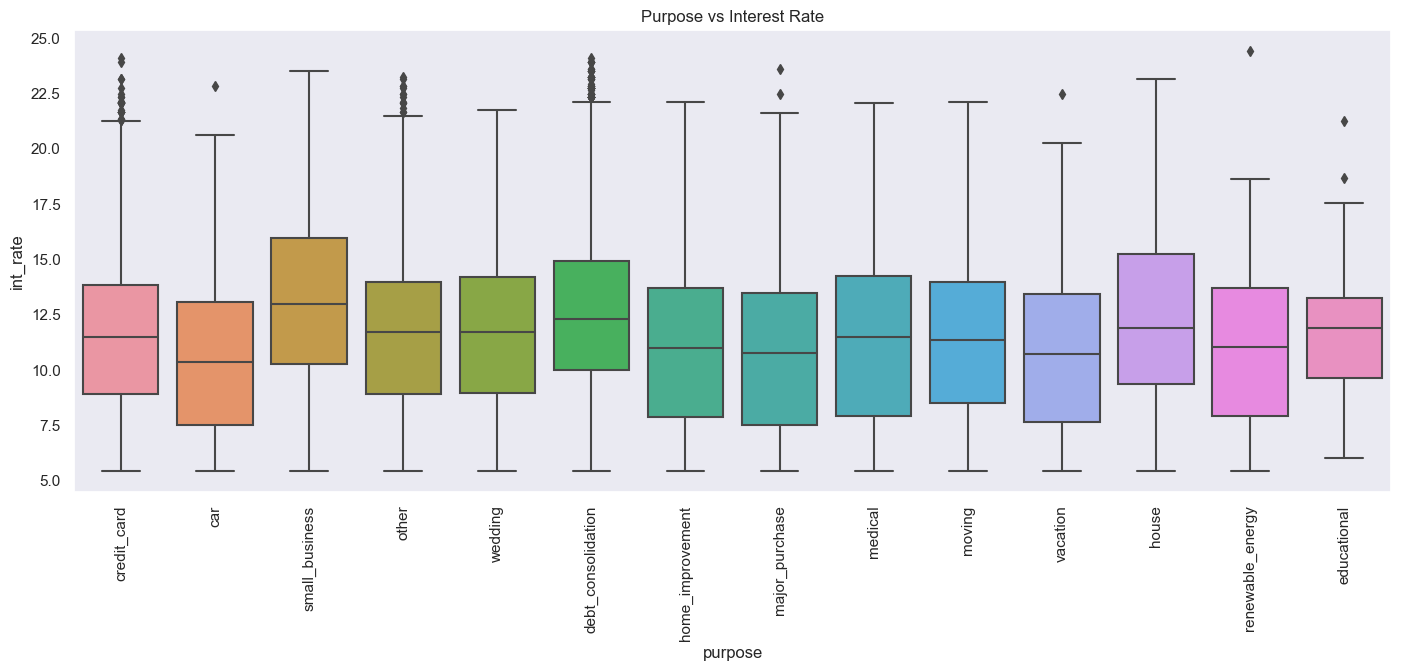

In [81]:
# Segment Interest Rate with "Purpose vs Interest Rate"

plt.figure(figsize=(17,6))
sns.boxplot(x="purpose", y="int_rate", data=data)
plt.title("Purpose vs Interest Rate")
plt.xticks(rotation=90)
plt.show()

#### Observations
- In purpose vs interest rate variable we can say that, small business , debt consolidation and house loan are geeting loan at high interest rate than others.

### Segment Interest Rate with "Employee Length vs Interest Rate"

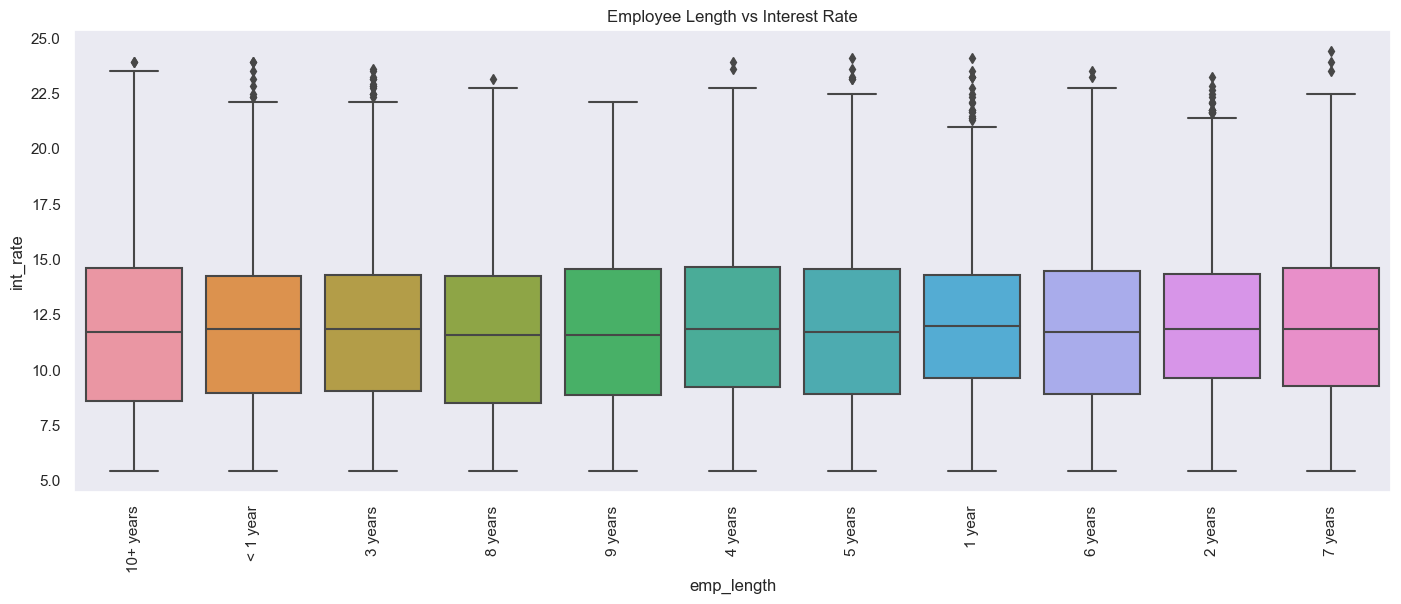

In [82]:
# Segment Interest Rate with "Employee Length vs Interest Rate"

plt.figure(figsize=(17,6))
sns.boxplot(x="emp_length", y="int_rate", data=data)
plt.title("Employee Length vs Interest Rate")
plt.xticks(rotation=90)
plt.show()

#### Observations
- There is no much relation between Employment length and interest rate.

### Segment Interest Rate with "Issue Month vs Interest Rate" and "Issue Year vs Interest Rate"

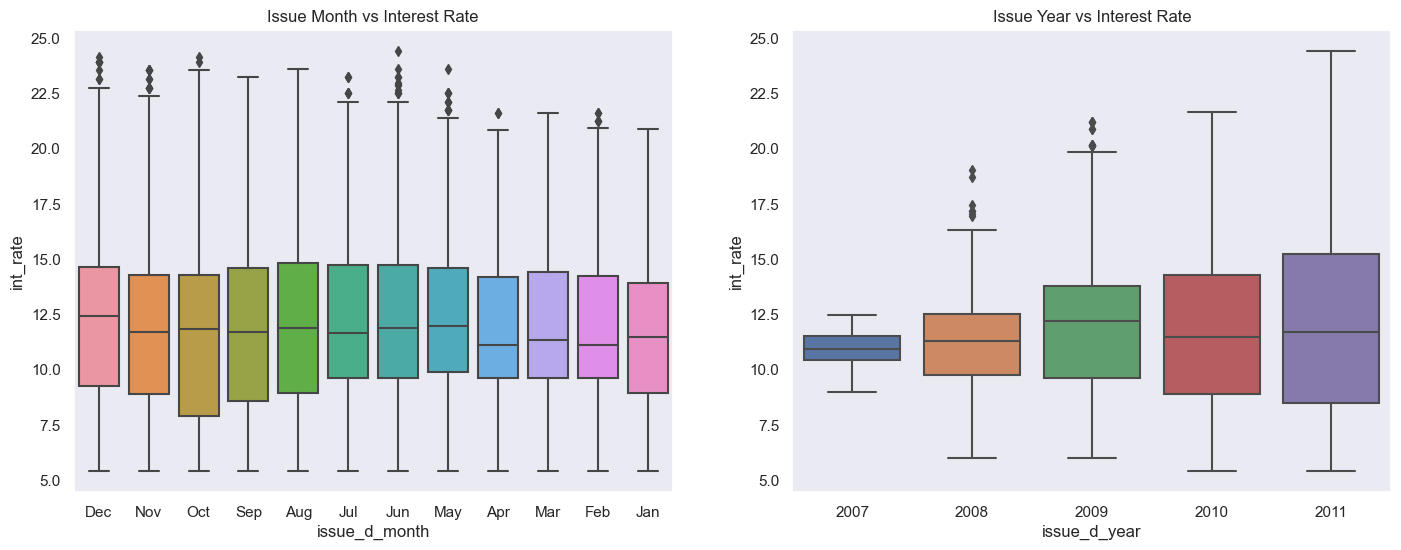

In [83]:
# Segment Interest Rate with "Issue Month vs Interest Rate" and "Issue Year vs Interest Rate"

plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
sns.boxplot(x="issue_d_month", y="int_rate", data=data)
plt.title("Issue Month vs Interest Rate")
plt.subplot(1,2,2)
sns.boxplot(x="issue_d_year", y="int_rate", data=data)
plt.title("Issue Year vs Interest Rate")
plt.show()

#### Observations
- As the year goes on the rate of interest is getting diversed but the median remains same throughout the year.

Let's segment <b>Debt to income ratio</b> with every variables.

### In Debt to income ratio compare "Term vs Interest Rate" and "Verification Status vs Interest Rate"

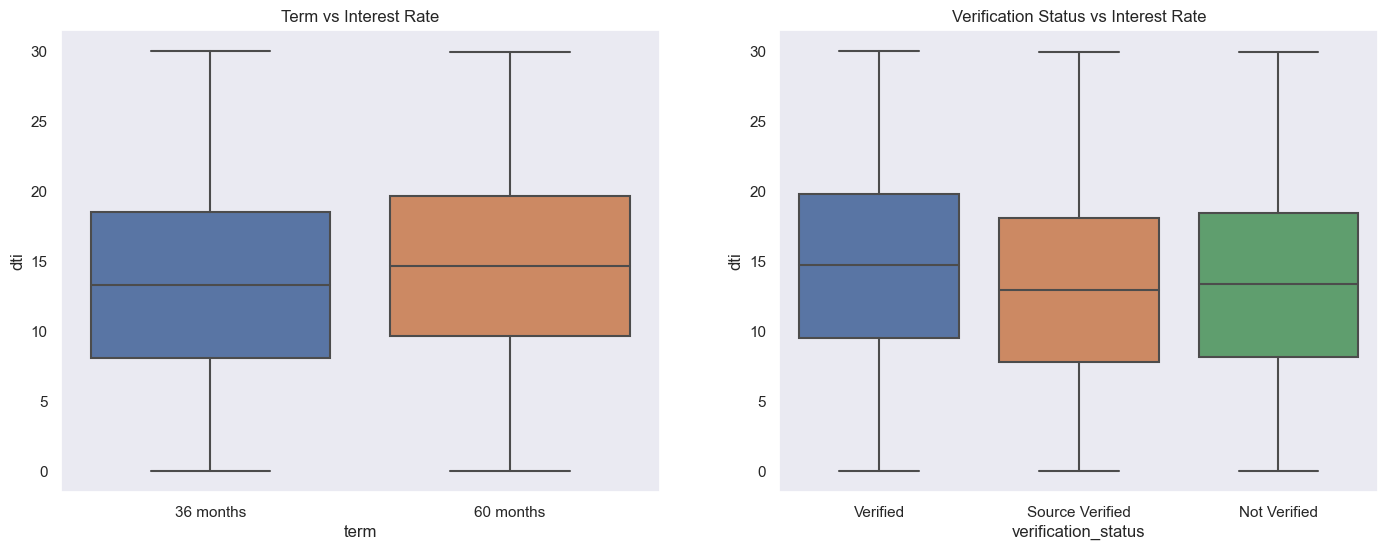

In [84]:
# In Debt to income ratio compare "Term vs Interest Rate" and "Verification Status vs Interest Rate"

plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="dti", data=data)
plt.title("Term vs Interest Rate")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="dti", data=data)
plt.title("Verification Status vs Interest Rate")
plt.show()

#### Observations
- In interest rate vs term variable we can say that, dti ratio is high for the borrower who has 60 months tenure.
- In Verification status vs dti we can say that, verified borrowers are having high dti ratio.

### In Debt to income ratio compare "Loan status vs DTI" and "Grade vs DTI"

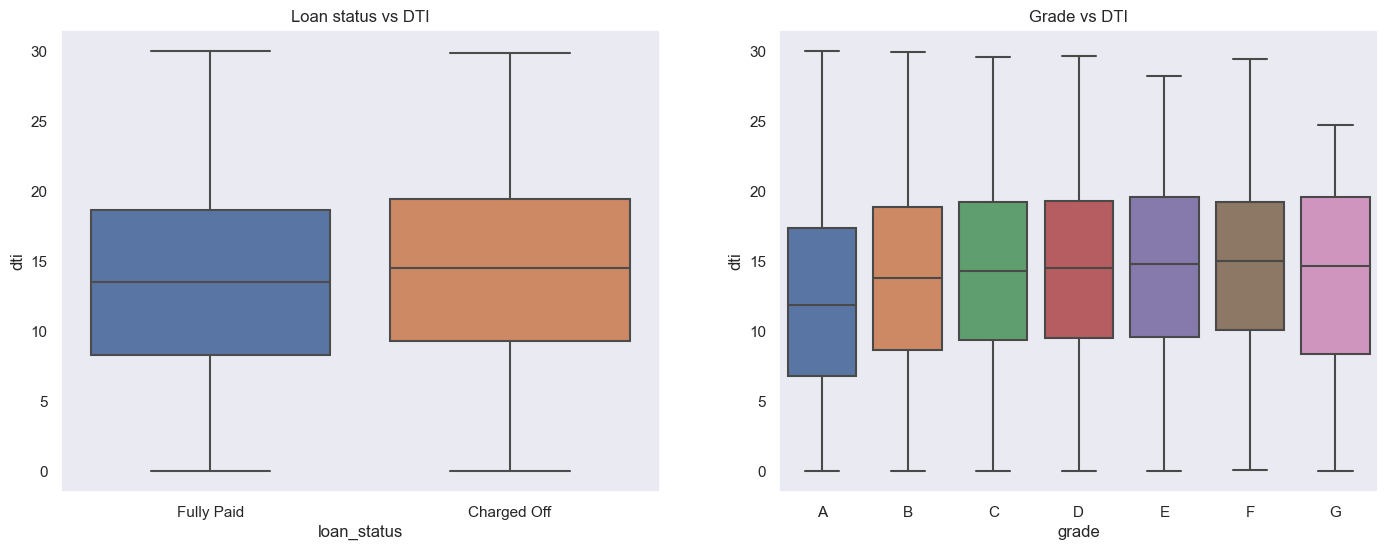

In [85]:
# In Debt to income ratio compare "Loan status vs DTI" and "Grade vs DTI"

plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="dti", data=data)
plt.title("Loan status vs DTI")
plt.subplot(1,2,2)
#arranging grade in alphabetically ascending order
grade_order = data["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="dti", order= grade_order, data=data)
plt.title("Grade vs DTI")
plt.show()

##### Observations
- Most of the charged off borrowers are having high dti ratio.
- As grade decreases dti ratio is increasing.

### In Debt to income ratio compare "Home Ownership vs DTI"

Text(0.5, 1.0, 'Home Ownership vs DTI')

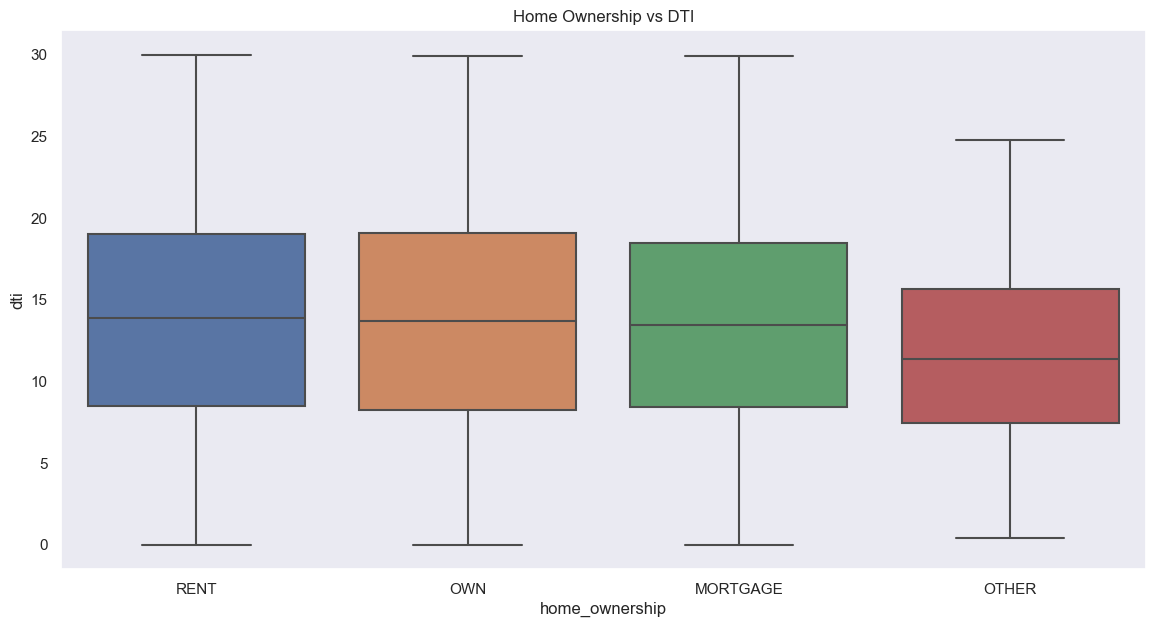

In [86]:
# In Debt to income ratio compare "Home Ownership vs DTI"

plt.figure(figsize=(14,7))
sns.boxplot(x="home_ownership", y="dti", data=data)
plt.title("Home Ownership vs DTI")

#### Observations
- In dti vs home ownership variable we can say that, the borrower with own and rent home status are having high dti ratio than others.

### In Debt to income ratio compare "Purpose of loan vs DTI"

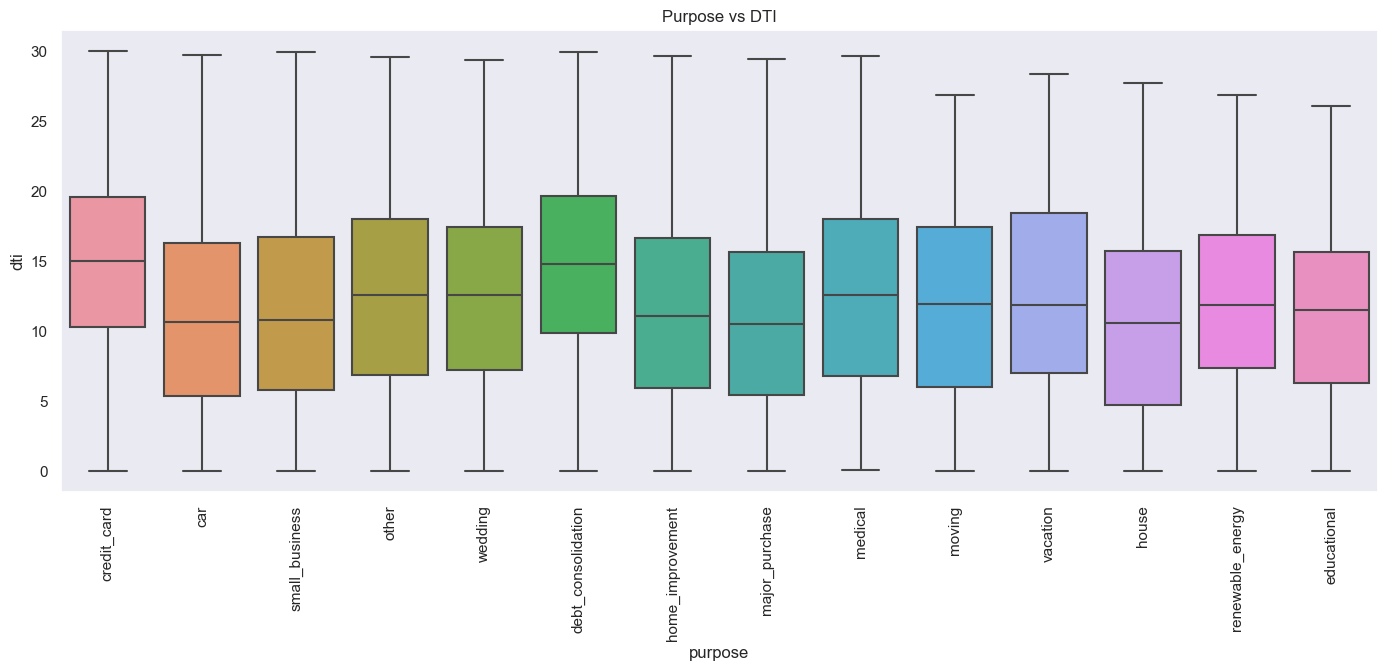

In [87]:
# In Debt to income ratio compare "Purpose of loan vs DTI"

plt.figure(figsize=(17,6))
sns.boxplot(x="purpose", y="dti", data=data)
plt.title("Purpose vs DTI")
plt.xticks(rotation=90)
plt.show()

#### Observations
- In purpose vs dti variable we can say that, the borrower who takes loan for the purpose of debt consolidation and credit card are having high dti ratio than others. 

### In Debt to income ratio compare "Employee Length (Years for experience) vs DTI"

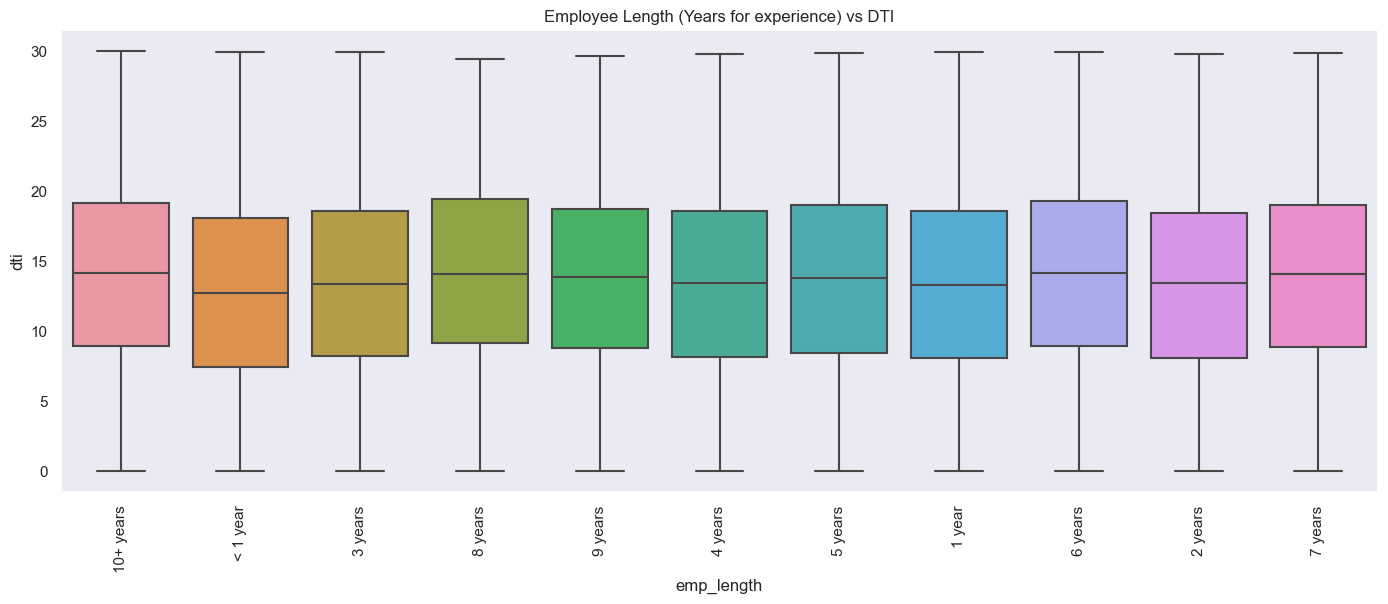

In [88]:
# In Debt to income ratio compare "Employee Length (Years for experience) vs DTI"

plt.figure(figsize=(17,6))
sns.boxplot(x="emp_length", y="dti", data=data)
plt.title("Employee Length (Years for experience) vs DTI")
plt.xticks(rotation=90)
plt.show()

#### Observations
- There is no much relation between employee length and dti ratio. 

Now, Let us analyse Charged Off Proportion with each variables.

##### Grouping annual income bin and loan status. Creating "Total" variable and sorting the chargedoff proportion in descending order

In [89]:
#grouping annual income bin and loan status
annual_inc_bin_vs_loan_status = data.groupby(['annual_inc_bin', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
#creating "Total" variable
annual_inc_bin_vs_loan_status['Total'] = annual_inc_bin_vs_loan_status['Charged Off'] + annual_inc_bin_vs_loan_status['Fully Paid'] 
#calculating chargedoff proportion
annual_inc_bin_vs_loan_status['Chargedoff_Proportion'] = annual_inc_bin_vs_loan_status['Charged Off'] / annual_inc_bin_vs_loan_status['Total']
#sorting the chargedoff proportion in descending order
annual_inc_bin_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status annual_inc_bin  Charged Off  Fully Paid  Total  \
0                  0-20000          173         774    947   
1              20000-40000         1369        6539   7908   
2              40000-60000         1630        9167  10797   
3              60000-80000          957        6400   7357   
4                  80000 +          876        7014   7890   

loan_status  Chargedoff_Proportion  
0                             0.18  
1                             0.17  
2                             0.15  
3                             0.13  
4                             0.11

### Analyse Charged Off Proportion with 'Annual Income vs Chargedoff Proportion'

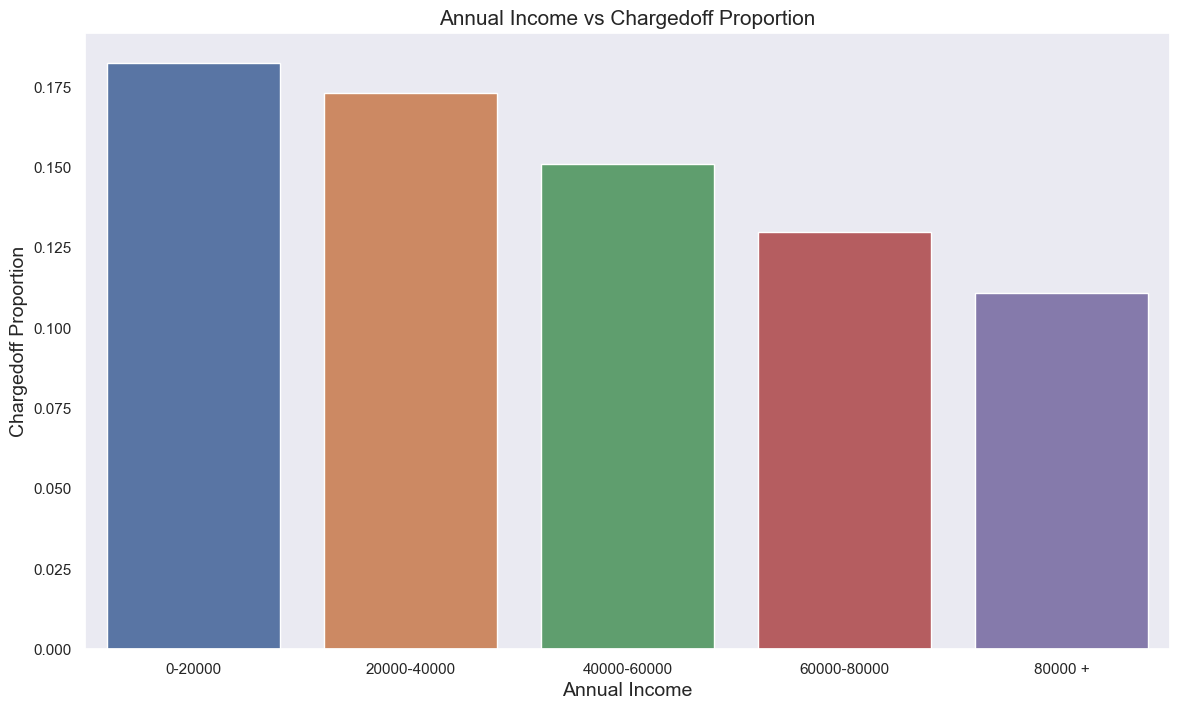

In [90]:
# Analyse Charged Off Proportion with 'Annual Income vs Chargedoff Proportion'

fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15)
#barplot
ax1=sns.barplot(x='annual_inc_bin', y='Chargedoff_Proportion', data=annual_inc_bin_vs_loan_status)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
ax1.set_xlabel('Annual Income',fontsize=14)
plt.show()

#### Observations
- From above chart we can say that, as annual income is increasing charged off proportion is decreasing.
- So highest charged off proportion are in the range 0 to 20k annual income.

In [91]:
purpose_vs_loan_status = data.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan_status['Total'] = purpose_vs_loan_status['Charged Off'] + purpose_vs_loan_status['Fully Paid'] 
purpose_vs_loan_status['Chargedoff_Proportion'] = purpose_vs_loan_status['Charged Off'] / purpose_vs_loan_status['Total']
purpose_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status             purpose  Charged Off  Fully Paid  Total  \
11               small_business          417        1111   1528   
10             renewable_energy           16          70     86   
3                   educational           46         234    280   
5                         house           52         267    319   
7                       medical           97         512    609   
9                         other          543        2884   3427   
8                        moving           79         437    516   
2            debt_consolidation         2509       14107  16616   
12                     vacation           49         282    331   
4              home_improvement          292        2140   2432   
0                           car          150        1233   1383   
1                   credit_card          478        4086   4564   
6                major_purchase          196        1754   1950   
13                      wedding           81         777    858   

loan_status  Chargedoff_Proportion  
11                            0.27  
10                            0.19  
3                             0.16  
5                             0.16  
7                             0.16  
9                             0.16  
8                             0.15  
2                             0.15  
12                            0.15  
4                             0.12  
0                             0.11  
1                             0.10  
6                             0.10  
13                            0.09

### Analyse Charged Off Proportion with 'Purpose of Loans vs Chargedoff Proportion'

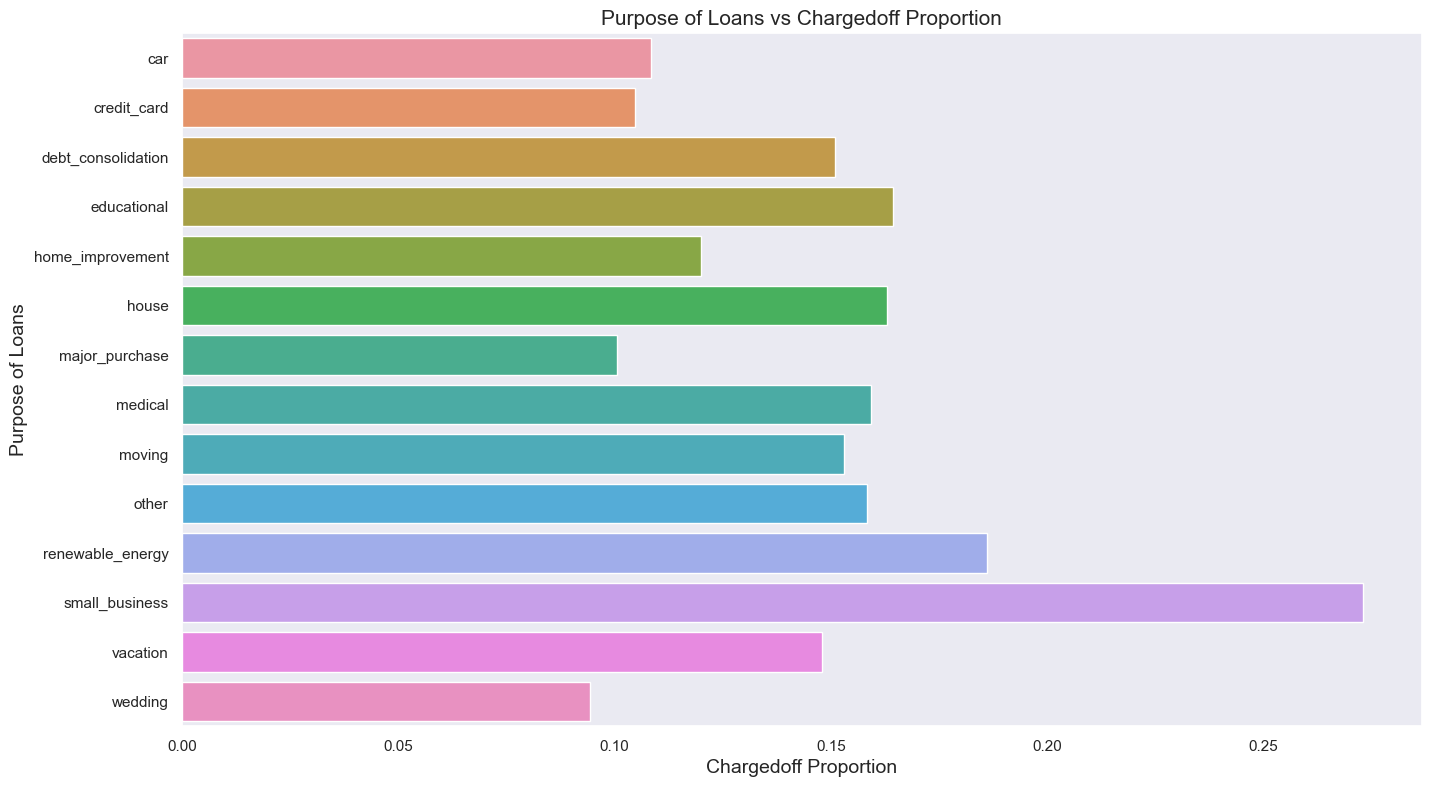

In [92]:
# Analyse Charged Off Proportion with 'Purpose of Loans vs Chargedoff Proportion'

fig, ax1 = plt.subplots(figsize=(16, 9))
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan_status)
ax1.set_ylabel('Purpose of Loans',fontsize=14)
ax1.set_xlabel('Chargedoff Proportion',fontsize=14)
plt.show()

#### Observations
- From above we can say that, the borrower who take loan for the purpose of small-business has the maximum charged off proportion.

In [93]:
grade_vs_loan_status = data.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan_status['Total'] = grade_vs_loan_status['Charged Off'] + grade_vs_loan_status['Fully Paid'] 
grade_vs_loan_status['Chargedoff_Proportion'] = grade_vs_loan_status['Charged Off'] / grade_vs_loan_status['Total']
grade_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status grade  Charged Off  Fully Paid  Total  Chargedoff_Proportion
6               G           90         166    256                   0.35
5               F          276         575    851                   0.32
4               E          624        1731   2355                   0.26
3               D         1000        3596   4596                   0.22
2               C         1208        5906   7114                   0.17
1               B         1269        9321  10590                   0.12
0               A          538        8599   9137                   0.06

### Analyse Charged Off Proportion with 'Grades vs Chargedoff Proportion'

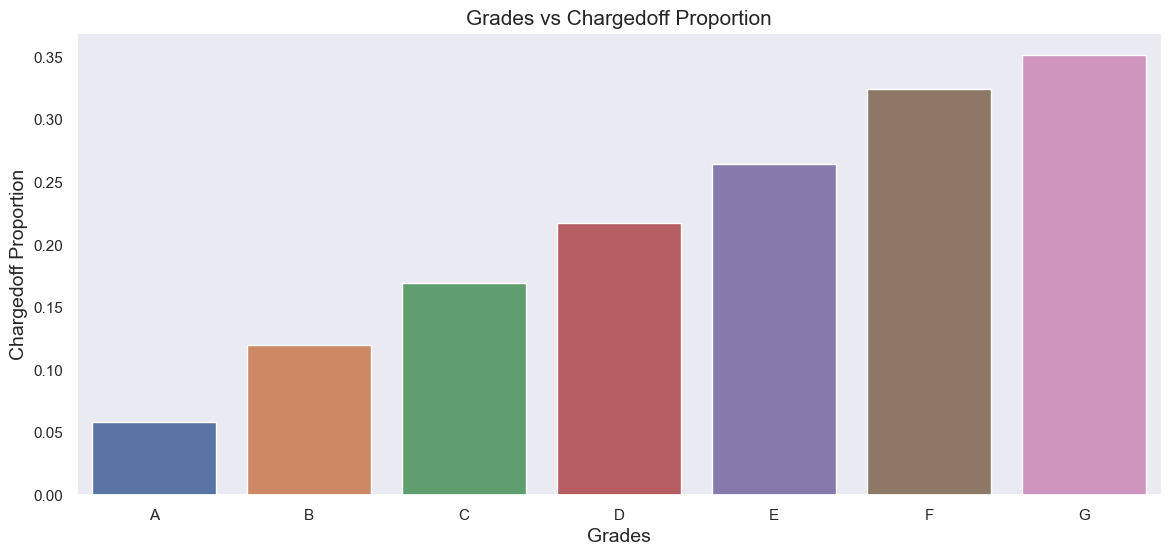

In [94]:
# Analyse Charged Off Proportion with 'Grades vs Chargedoff Proportion'

fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.set_title('Grades vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan_status)
ax1.set_xlabel('Grades',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

#### Observations
- From above chart we can say that, as grades are decreasing charged off proportion is increasing.

In [95]:
sub_grade_vs_loan_status = data.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
sub_grade_vs_loan_status['Total'] = sub_grade_vs_loan_status['Charged Off'] + sub_grade_vs_loan_status['Fully Paid'] 
sub_grade_vs_loan_status['Chargedoff_Proportion'] = sub_grade_vs_loan_status['Charged Off'] / sub_grade_vs_loan_status['Total']
sub_grade_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status sub_grade  Charged Off  Fully Paid  Total  Chargedoff_Proportion
29                 F5           48          45     93                   0.52
32                 G3           19          22     41                   0.46
34                 G5            9          12     21                   0.43
31                 G2           25          41     66                   0.38
28                 F4           45          87    132                   0.34
30                 G1           26          57     83                   0.31
26                 F2           62         143    205                   0.30
23                 E4          112         266    378                   0.30
27                 F3           44         108    152                   0.29
25                 F1           77         192    269                   0.29
24                 E5           94         235    329                   0.29
20                 E1          178         478    656                   0.27
21                 E2          139         403    542                   0.26
19                 D5          191         558    749                   0.26
33                 G4           11          34     45                   0.24
18                 D4          191         640    831                   0.23
17                 D3          230         786   1016                   0.23
22                 E3          101         349    450                   0.22
16                 D2          240         921   1161                   0.21
12                 C3          245        1104   1349                   0.18
14                 C5          186         849   1035                   0.18
15                 D1          148         691    839                   0.18
13                 C4          190         897   1087                   0.17
11                 C2          288        1484   1772                   0.16
10                 C1          299        1572   1871                   0.16
9                  B5          330        2065   2395                   0.14
8                  B4          297        1942   2239                   0.13
7                  B3          307        2239   2546                   0.12
6                  B2          193        1613   1806                   0.11
5                  B1          142        1462   1604                   0.09
4                  A5          200        2287   2487                   0.08
3                  A4          162        2485   2647                   0.06
2                  A3           86        1557   1643                   0.05
1                  A2           66        1294   1360                   0.05
0                  A1           24         976   1000                   0.02

### Analyse Charged Off Proportion with 'Sub Grades vs Chargedoff Proportion'

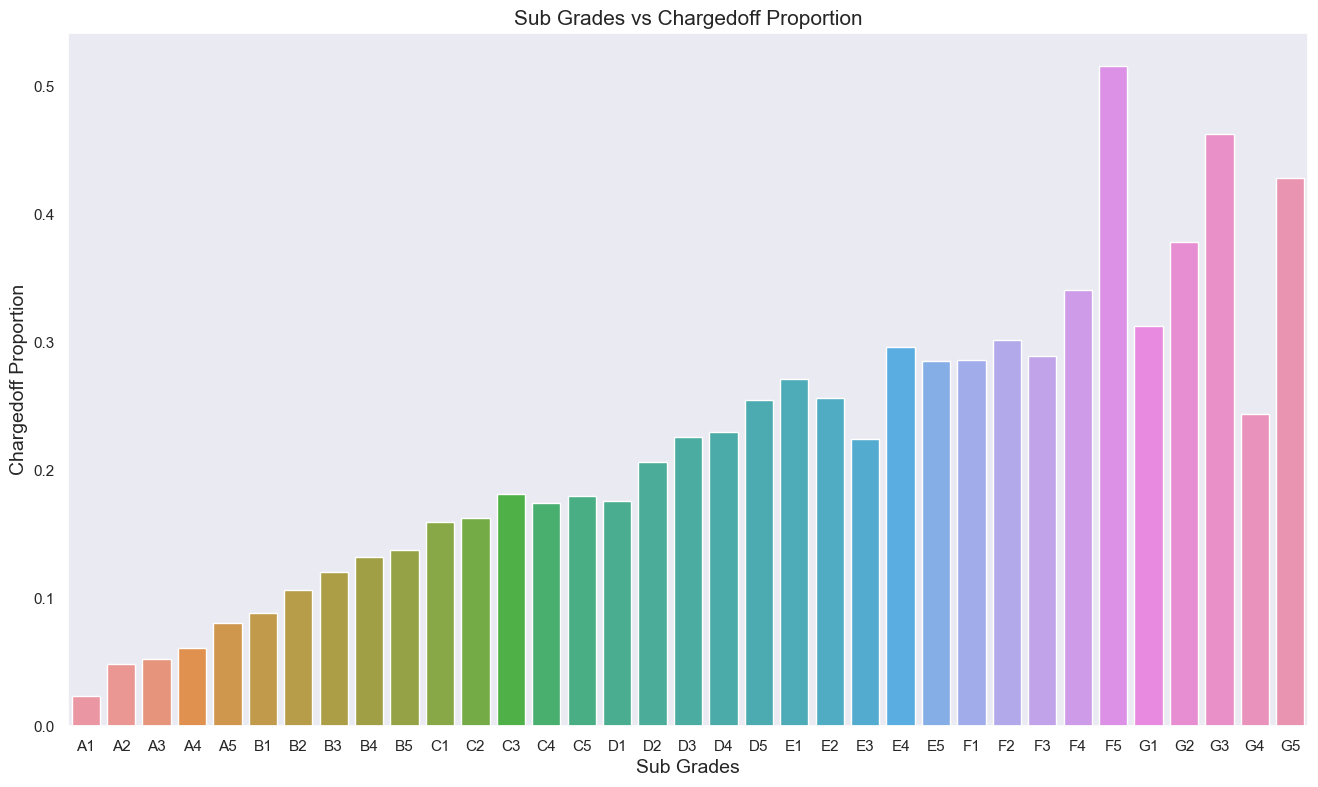

In [96]:
# Analyse Charged Off Proportion with 'Sub Grades vs Chargedoff Proportion'

fig, ax1 = plt.subplots(figsize=(16, 9))
ax1.set_title('Sub Grades vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='sub_grade', y='Chargedoff_Proportion', data=sub_grade_vs_loan_status)
ax1.set_xlabel('Sub Grades',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

#### Observations
- Subgrade F5, G3 and G5 are having maximum charged off proportion.

In [97]:
int_rate_bin_vs_loan_status = data.groupby(['int_rate_bin', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
int_rate_bin_vs_loan_status['Total'] = int_rate_bin_vs_loan_status['Charged Off'] + int_rate_bin_vs_loan_status['Fully Paid'] 
int_rate_bin_vs_loan_status['Chargedoff_Proportion'] = int_rate_bin_vs_loan_status['Charged Off'] / int_rate_bin_vs_loan_status['Total']
int_rate_bin_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status int_rate_bin  Charged Off  Fully Paid  Total  \
2                  15-20         1627        4942   6569   
1                  10-15         2405       14182  16587   
0                   5-10          714       10368  11082   

loan_status  Chargedoff_Proportion  
2                             0.25  
1                             0.14  
0                             0.06

### Analyse Charged Off Proportion with 'Interest Rate vs Chargedoff Proportion'

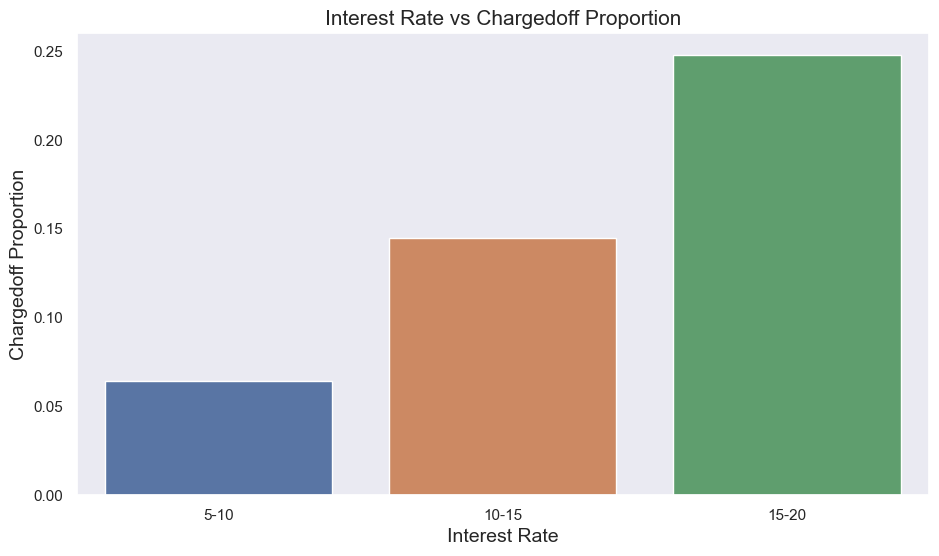

In [98]:
# Analyse Charged Off Proportion with 'Interest Rate vs Chargedoff Proportion'

fig, ax1 = plt.subplots(figsize=(11, 6))
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='int_rate_bin', y='Chargedoff_Proportion', data=int_rate_bin_vs_loan_status)
ax1.set_xlabel('Interest Rate',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

#### Observations
- As interest rate are increasing, charged off proportion is also increasing.
- The borrower who takes loan at the interest rate of 15 to 20 are getting mostly charged off.

In [99]:
emp_length_vs_loan_status = data.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emp_length_vs_loan_status['Total'] = emp_length_vs_loan_status['Charged Off'] + emp_length_vs_loan_status['Fully Paid'] 
emp_length_vs_loan_status['Chargedoff_Proportion'] = emp_length_vs_loan_status['Charged Off'] / emp_length_vs_loan_status['Total']
emp_length_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status emp_length  Charged Off  Fully Paid  Total  Chargedoff_Proportion
1            10+ years         1233        6537   7770                   0.16
7              7 years          246        1371   1617                   0.15
0               1 year          422        2521   2943                   0.14
5              5 years          426        2574   3000                   0.14
8              8 years          187        1131   1318                   0.14
6              6 years          287        1754   2041                   0.14
10            < 1 year          581        3570   4151                   0.14
3              3 years          524        3236   3760                   0.14
4              4 years          423        2721   3144                   0.13
2              2 years          530        3488   4018                   0.13
9              9 years          146         991   1137                   0.13

### Analyse Charged Off Proportion with 'Employment Length (year for experience) vs Chargedoff Proportion'

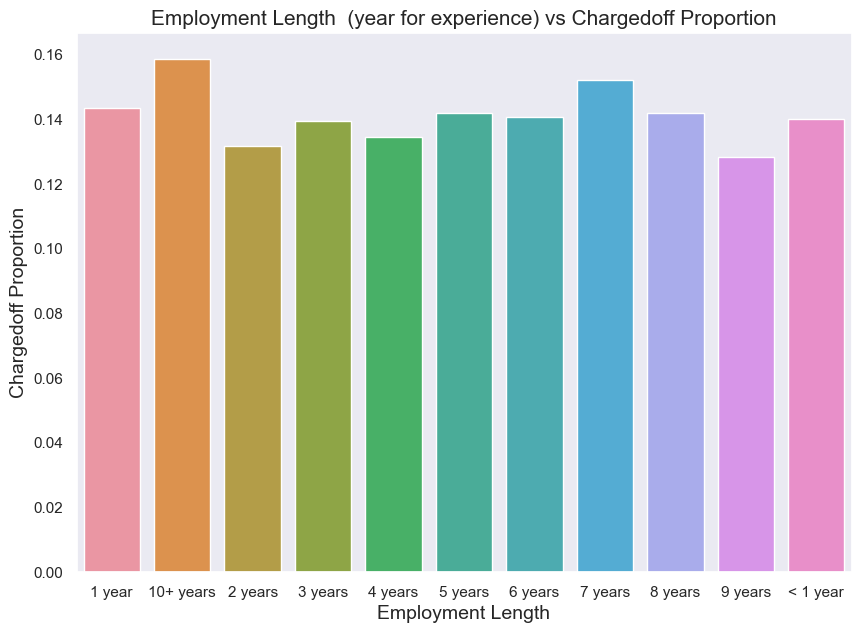

In [100]:
# Analyse Charged Off Proportion with 'Employment Length (year for experience) vs Chargedoff Proportion'

fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.set_title('Employment Length  (year for experience) vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=emp_length_vs_loan_status)
ax1.set_xlabel('Employment Length',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

##### Observations
- The borrowers whose employee length is less than 1 year, 1 year and 10+ year are mostly getting charged off.

In [101]:
addr_state_vs_loan_status = data.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan_status['Total'] = addr_state_vs_loan_status['Charged Off'] + addr_state_vs_loan_status['Fully Paid'] 
addr_state_vs_loan_status['Chargedoff_Proportion'] = addr_state_vs_loan_status['Charged Off'] / addr_state_vs_loan_status['Total']
addr_state_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status addr_state  Charged Off  Fully Paid   Total  Chargedoff_Proportion
31                  NV        96.00      343.00  439.00                   0.22
40                  TN         2.00        8.00   10.00                   0.20
0                   AK        13.00       55.00   68.00                   0.19
39                  SD        11.00       48.00   59.00                   0.19
11                  HI        28.00      127.00  155.00                   0.18
9                   FL       442.00     2074.00 2516.00                   0.18
30                  NM        29.00      138.00  167.00                   0.17
35                  OR        67.00      340.00  407.00                   0.16
23                  MO       100.00      515.00  615.00                   0.16
29                  NJ       258.00     1357.00 1615.00                   0.16
10                  GA       195.00     1032.00 1227.00                   0.16
28                  NH        23.00      122.00  145.00                   0.16
4                   CA       982.00     5300.00 6282.00                   0.16
45                  WA       113.00      614.00  727.00                   0.16
20                  MD       142.00      782.00  924.00                   0.15
42                  UT        35.00      196.00  231.00                   0.15
26                  NC       100.00      562.00  662.00                   0.15
17                  KY        44.00      253.00  297.00                   0.15
38                  SC        62.00      364.00  426.00                   0.15
46                  WI        57.00      340.00  397.00                   0.14
21                  MI        91.00      549.00  640.00                   0.14
3                   AZ       107.00      647.00  754.00                   0.14
34                  OK        38.00      236.00  274.00                   0.14
14                  IL       185.00     1173.00 1358.00                   0.14
22                  MN        75.00      480.00  555.00                   0.14
37                  RI        24.00      158.00  182.00                   0.13
43                  VA       164.00     1081.00 1245.00                   0.13
32                  NY       430.00     2854.00 3284.00                   0.13
18                  LA        50.00      332.00  382.00                   0.13
25                  MT        10.00       67.00   77.00                   0.13
6                   CT        83.00      561.00  644.00                   0.13
33                  OH       138.00      957.00 1095.00                   0.13
47                  WV        20.00      140.00  160.00                   0.12
5                   CO        85.00      611.00  696.00                   0.12
19                  MA       138.00     1009.00 1147.00                   0.12
36                  PA       163.00     1215.00 1378.00                   0.12
1                   AL        47.00      351.00  398.00                   0.12
44                  VT         6.00       45.00   51.00                   0.12
41                  TX       274.00     2094.00 2368.00                   0.12
2                   AR        25.00      192.00  217.00                   0.12
16                  KS        25.00      206.00  231.00                   0.11
8                   DE        11.00       92.00  103.00                   0.11
24                  MS         2.00       17.00   19.00                   0.11
7                   DC        12.00      179.00  191.00                   0.06
48                  WY         3.00       72.00   75.00                   0.04
27                  NE         0.00        1.00    1.00                   0.00
15                  IN         0.00        1.00    1.00                   0.00
13                  ID         0.00        3.00    3.00                   0.00
12                  IA         0.00        1.00    1.00                   0.00

### Analyse Charged Off Proportion with 'Address State vs Chargedoff Proportion'

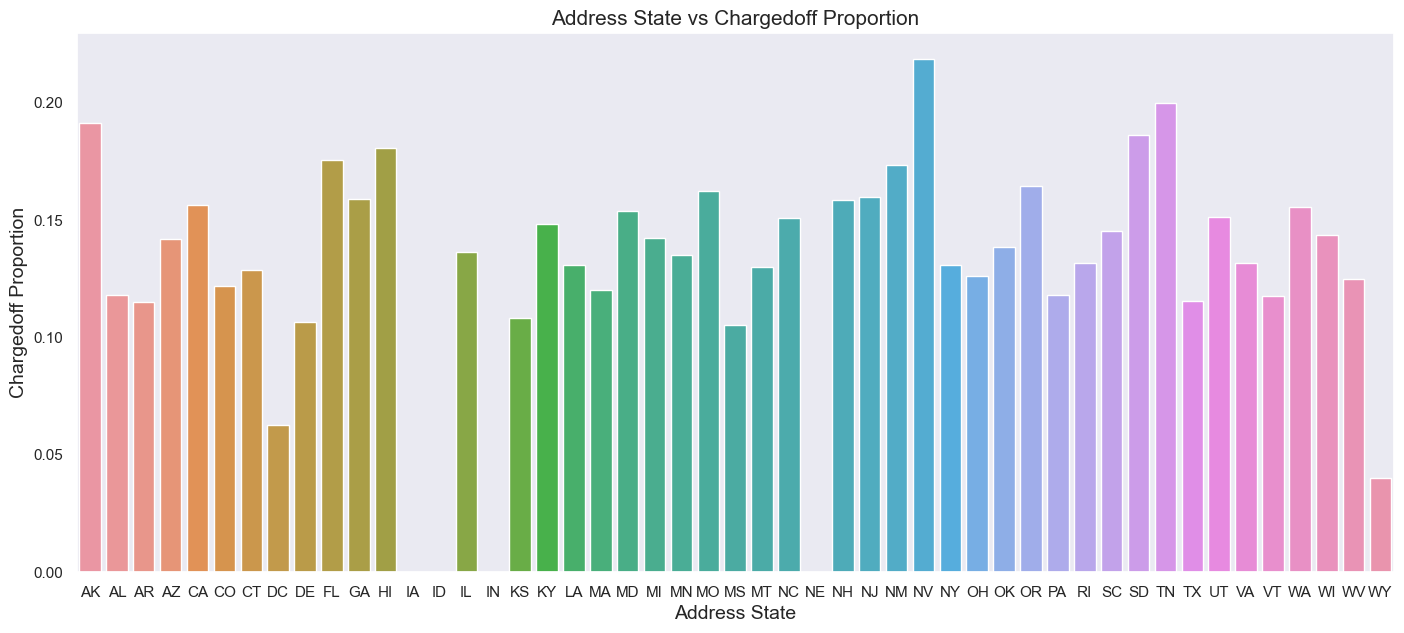

In [102]:
# Analyse Charged Off Proportion with 'Address State vs Chargedoff Proportion'

fig, ax1 = plt.subplots(figsize=(17, 7))
ax1.set_title('Address State vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=addr_state_vs_loan_status)
ax1.set_xlabel('Address State',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

#### Observations
- The borrowers who are from NV, AK, TN state are mostly getting charged off.

In [103]:
verification_status_vs_loan_status = data.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verification_status_vs_loan_status['Total'] = verification_status_vs_loan_status['Charged Off'] + verification_status_vs_loan_status['Fully Paid'] 
verification_status_vs_loan_status['Chargedoff_Proportion'] = verification_status_vs_loan_status['Charged Off'] / verification_status_vs_loan_status['Total']
verification_status_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status verification_status  Charged Off  Fully Paid  Total  \
2                      Verified         1832        8954  10786   
1               Source Verified         1320        7639   8959   
0                  Not Verified         1853       13301  15154   

loan_status  Chargedoff_Proportion  
2                             0.17  
1                             0.15  
0                             0.12

### Analyse Charged Off Proportion with 'Verification Status vs Chargedoff Proportion'

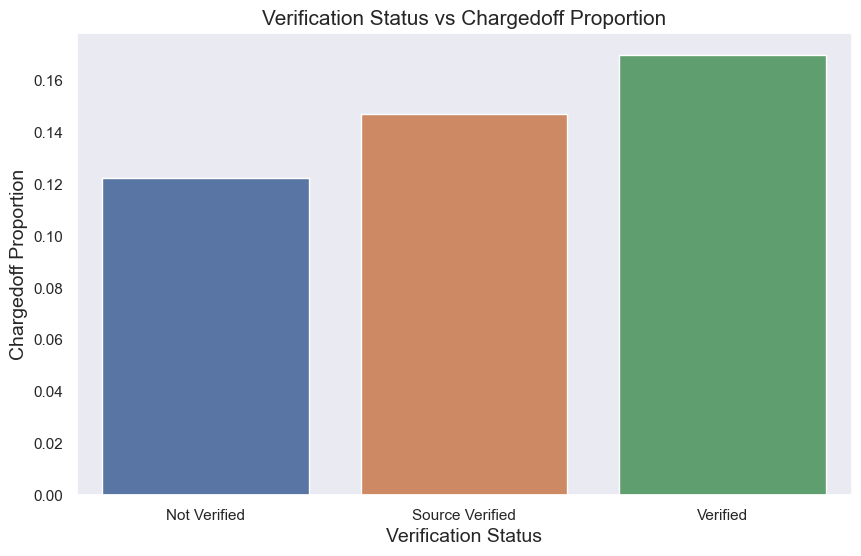

In [104]:
# Analyse Charged Off Proportion with 'Verification Status vs Chargedoff Proportion'

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title('Verification Status vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=verification_status_vs_loan_status)
ax1.set_xlabel('Verification Status',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

#### Observations
- Most of the verified borrowers are getting charged off than others.

# 7) Multivariate Analysis

### With multivariate Analysis finding the correlation matrix on clustermap

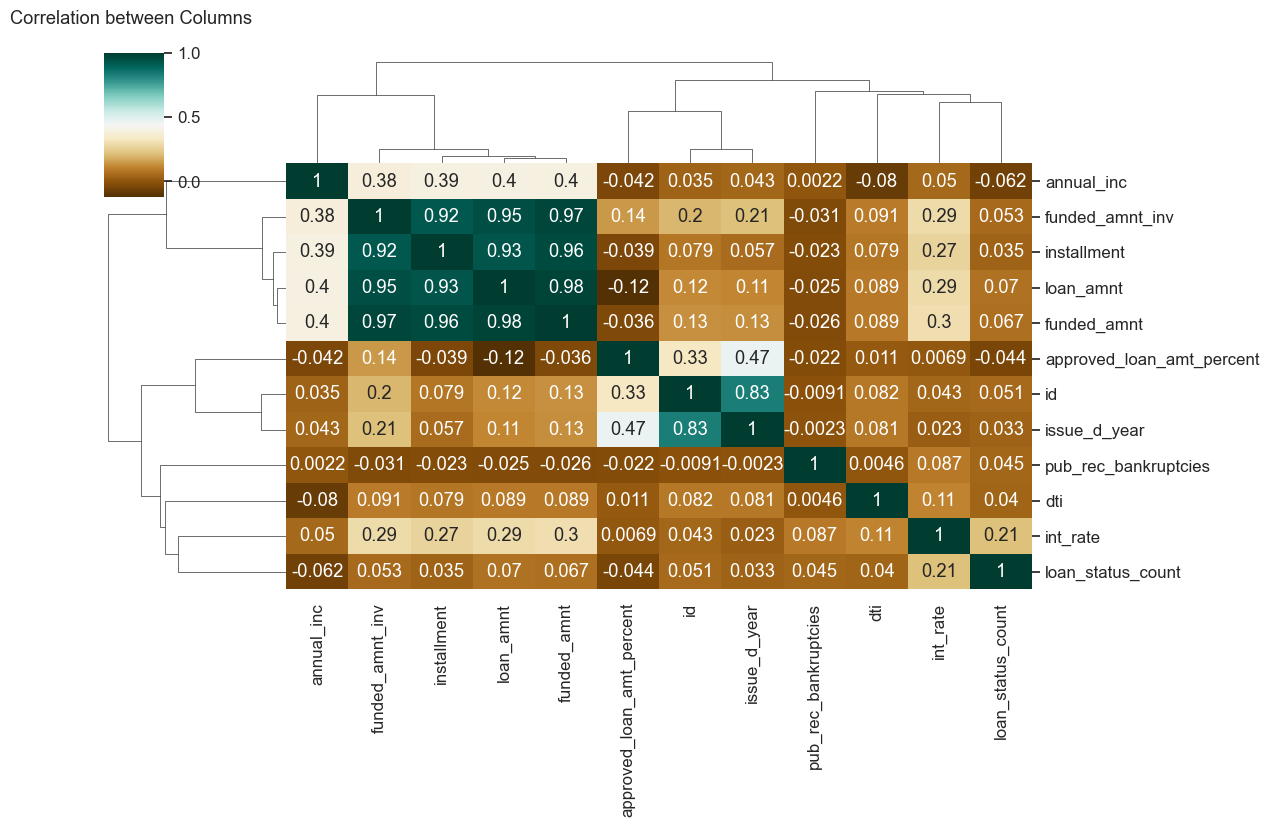

In [105]:
#Finding correlation matrix
loan_correlation = data.corr()
sns.set(font_scale=1.1)
#plotting correaltion matrix on clustermap
sns.clustermap(loan_correlation,annot=True,figsize=(12, 8),cmap="BrBG")
plt.title("Correlation between Columns \n")
plt.show()

#### Observations
- <b>loan_amnt , funded_amnt , funded_amnt_inv , installment</b> are strongly correlated.
- <b>annual_inc and dti</b> is negatively correlated.
- Debt income ratio is the percentage of a borrower's monthly gross income that goes toward paying debts. 
- Which means when annual_inc is low, debt is high and vice versa.

### With multivariate Analysis finding the correlation matrix on pair plot by loan status with a density plot of the  diagonal and format the scatter plots.

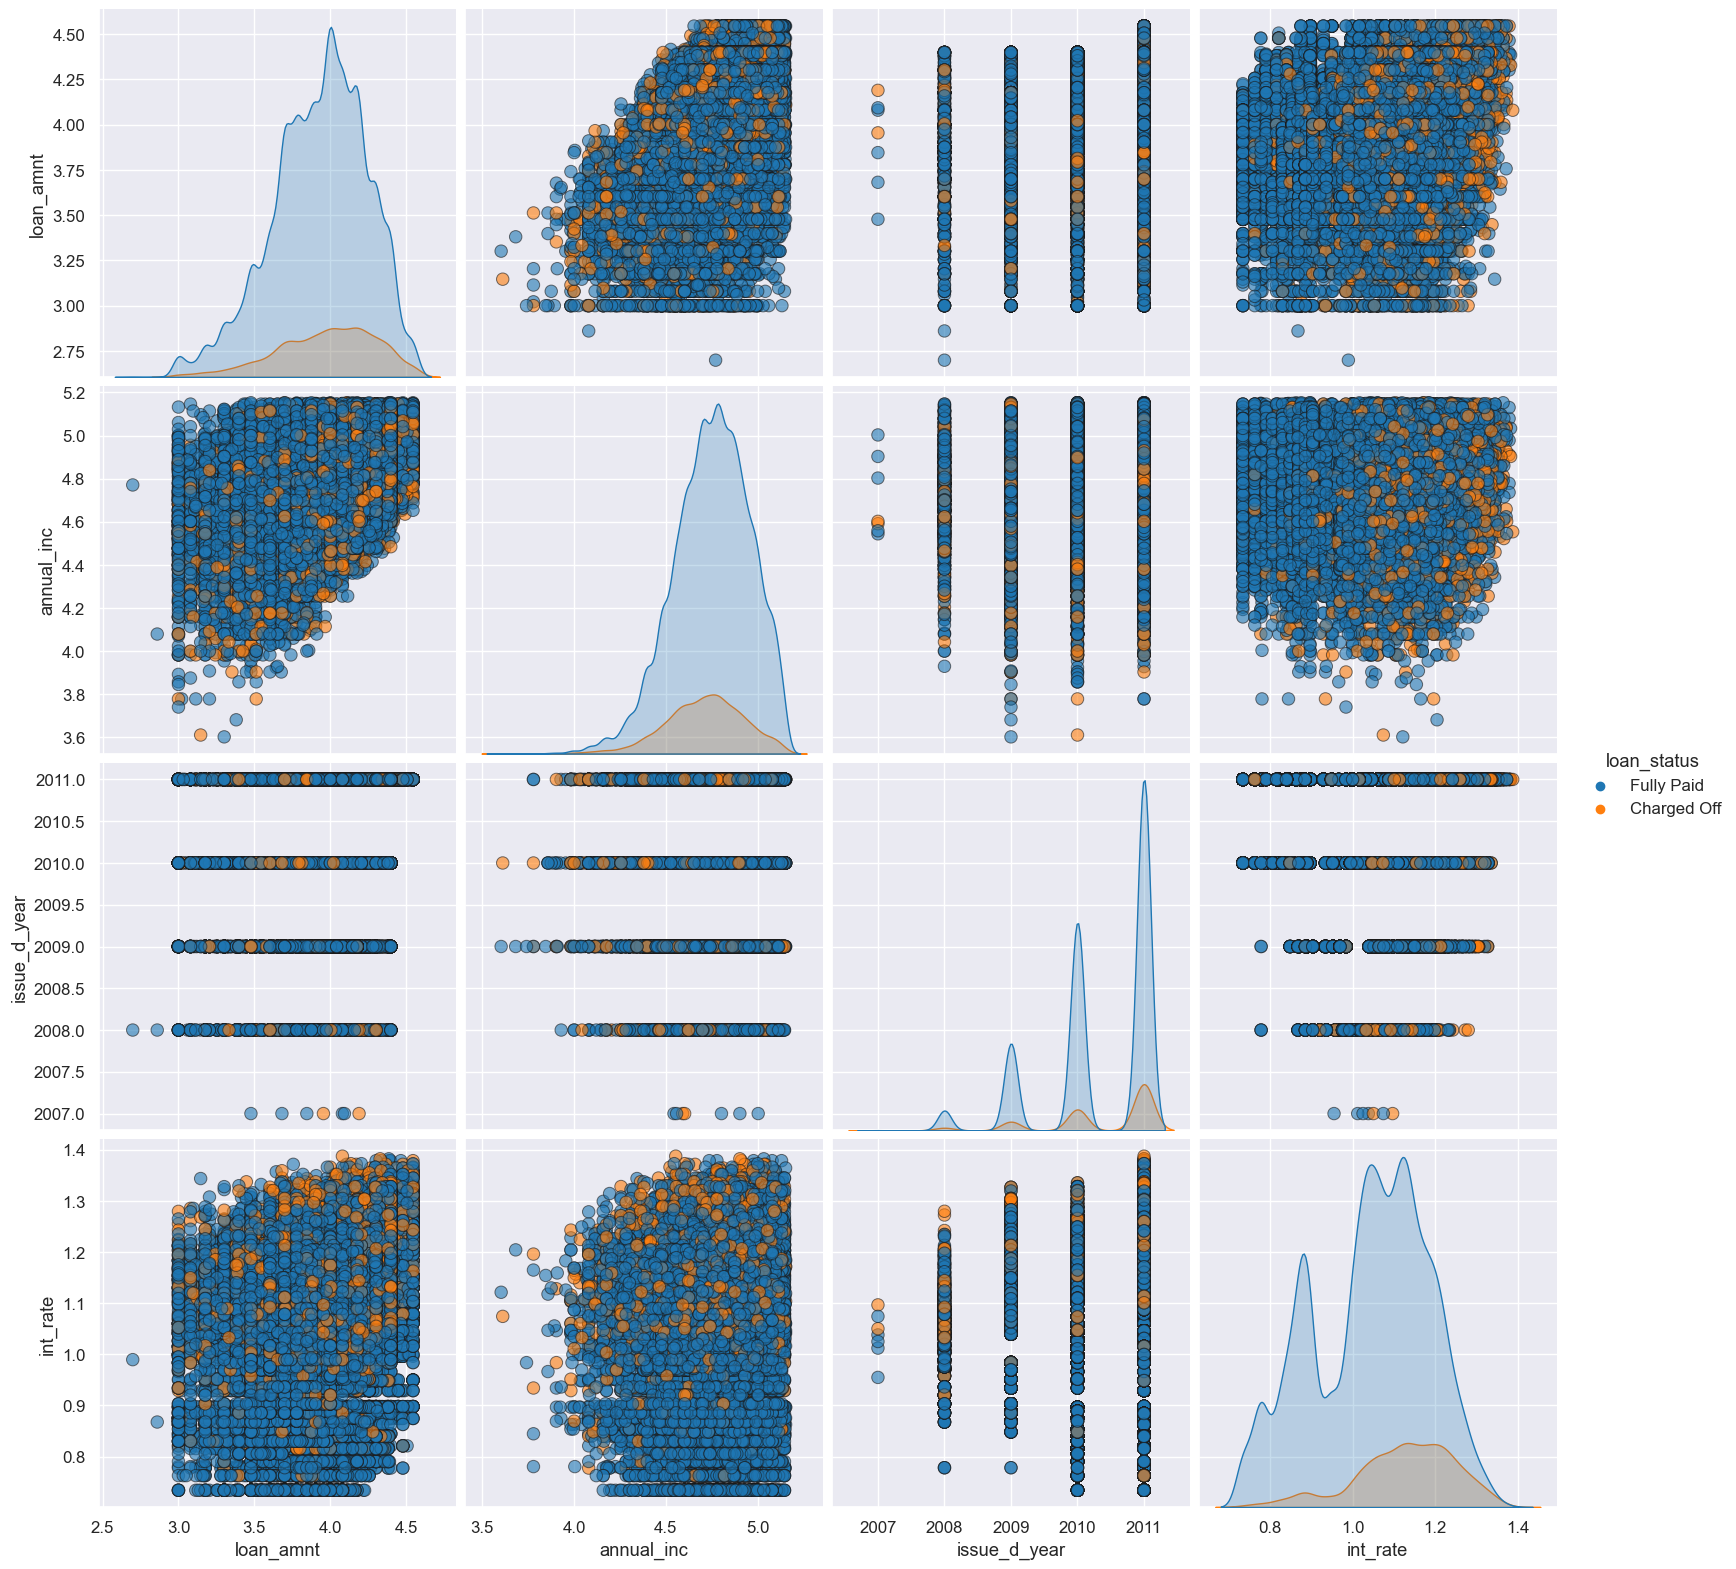

In [106]:
# Analysis the pair plot with for multivariate with few imporatnt columns to findout loan status with a density plot
sns.set_palette("tab10")
lending_loan_pair = data[['loan_amnt', 'annual_inc', 'issue_d_year','int_rate','loan_status']].copy()
lending_loan_pair.head()

# Taking the logs of below variables
lending_loan_pair['int_rate'] = np.log10(lending_loan_pair['int_rate'])
lending_loan_pair['loan_amnt'] = np.log10(lending_loan_pair['loan_amnt'])
lending_loan_pair['annual_inc'] = np.log10(lending_loan_pair['annual_inc'])

# Create a pair plot colored by loan status with a density plot of the diagonal and format the scatter plots.
sns.pairplot(lending_loan_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

### Observation:

- The higher the annual income, the higher the loan amount slightly.
- Interest rate is increasing with loan amount increase.
- Increase in the number of charged-off with an increase in year.
- The higher the interest rate, the higher the charged-off ratio.

# 8) Recommendations / Summarize Results

#### From the above analysis, we can say that there is a higher probability of defaulting when:
- Borrowers are taking loans for a term of 60 months.
- Borrowers whose loan status is ‘Verified’ as they took a high loan amount with 60 months tenure.
- Borrowers who have home ownership as ‘Rent’ and take loans for the purpose of debt consolidation.
- Borrowers whose annual income is low i.e. (0-20000).
- Borrowers who take loan amounts in the range of 0 to 14000.
- Borrowers who receive interest at the rate of 15-20%.
- Borrower who takes a loan for the purpose of small business.
- Borrowers with lower Grades i.e., F<G.
- Borrower’s whose subgrade is F5, G3, G5.